In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install xgboost
# !pip install pandas
# !pip install seaborn
# !pip install numpy
# !pip install imblearn

# Load Dataset

In [26]:
raw_ecommerce = pd.read_csv('dataset/Dataset.csv')

In [27]:
raw_ecommerce.columns = raw_ecommerce.columns.str.lower()

# EDA

### Descriptive Statistics

In [9]:
raw_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [10]:
raw_ecommerce.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [11]:
raw_ecommerce.duplicated().sum()

711

terdapat **12946** baris data, dengan jumlah attribut 18. Dari 18 attribut, dideteksi ada 5 attribut yang memiliki nilai kosong. dan terdapat **711** data duplikat

In [12]:
cats = ['month','weekend','specialday','region','operatingsystems','browser','traffictype','visitortype','revenue']
nums = ['administrative','administrative_duration','informational','informational_duration',
        'productrelated','productrelated_duration',
        'bouncerates','exitrates','pagevalues']

In [13]:
raw_ecommerce.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000,12946.000000,12422.000000,12946.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963,0.061270,2.123169,2.360497,3.144369,4.078248
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670,0.198667,0.906264,1.718878,2.402477,4.025467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
raw_ecommerce[cats].astype(str).describe()

KeyError: "None of [Index(['month', 'weekend', 'specialday', 'region', 'operatingsystems',\n       'browser', 'traffictype', 'visitortype', 'revenue'],\n      dtype='object')] are in the [columns]"

In [22]:
raw_ecommerce['revenue'].value_counts() / len(raw_ecommerce['revenue'])*100

False    84.489418
True     15.510582
Name: revenue, dtype: float64

### 1. Descriptive Statistics Insight

- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 
---
A.

- tipe data kolom operating system dapat menggunakan tipe data int,\
- tipe data kolom month juga dapat menggunakan int. kolom lainnnya sudah sesuai.

B. 

Terdapat 12.946 baris data, dengan jumlah fitur 18. Dari 18 fitur tersebut, ada 5 fitur yang memiliki nilai null diantaranya:

1. Administrative `111` null data
2. Administrative_Duration `633` null data
3. ProductRelated_Duration `639` null data
4. BounceRates `74` null data
5. OperatingSystems `524` null data

Selain nilai null, juga terdapat 711 data *duplicated*

C. 
- Untuk fitur numerik (nums) terdapat outlier pada masing-masing fiturnya, dan sebaran nilai masing-masing fitur merupakan sebaran positively skewed, karena nilai mean yang lebih besar dari nilai median nya.

- Sedangkan untuk fitur kategorikal (cats), fitur revenue dipilih sebagai target. tetapi atribut ini memiliki imbalances, dimana nilai False/Not Buyer terdapat sebanyak 10.938 data, sehingga perlu untuk disesuaikan ketika proses training.

## Univariate Analysis

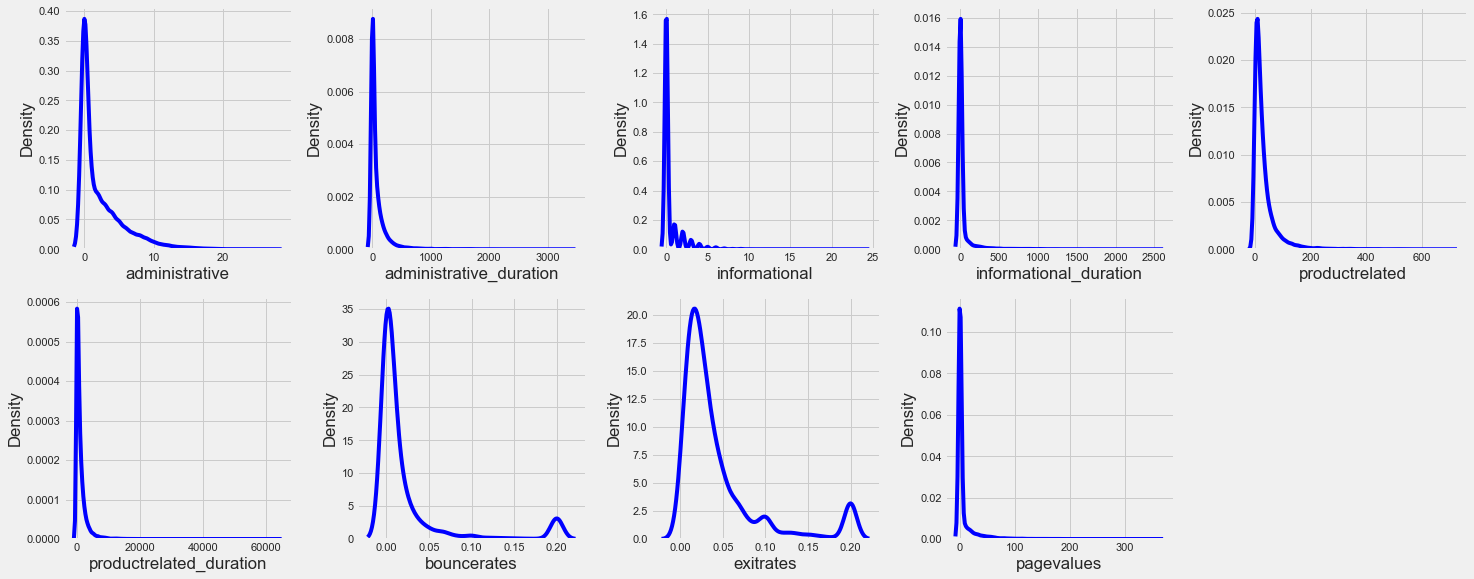

In [23]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.kdeplot(x=raw_ecommerce[nums[i]], color='blue')
plt.tight_layout()

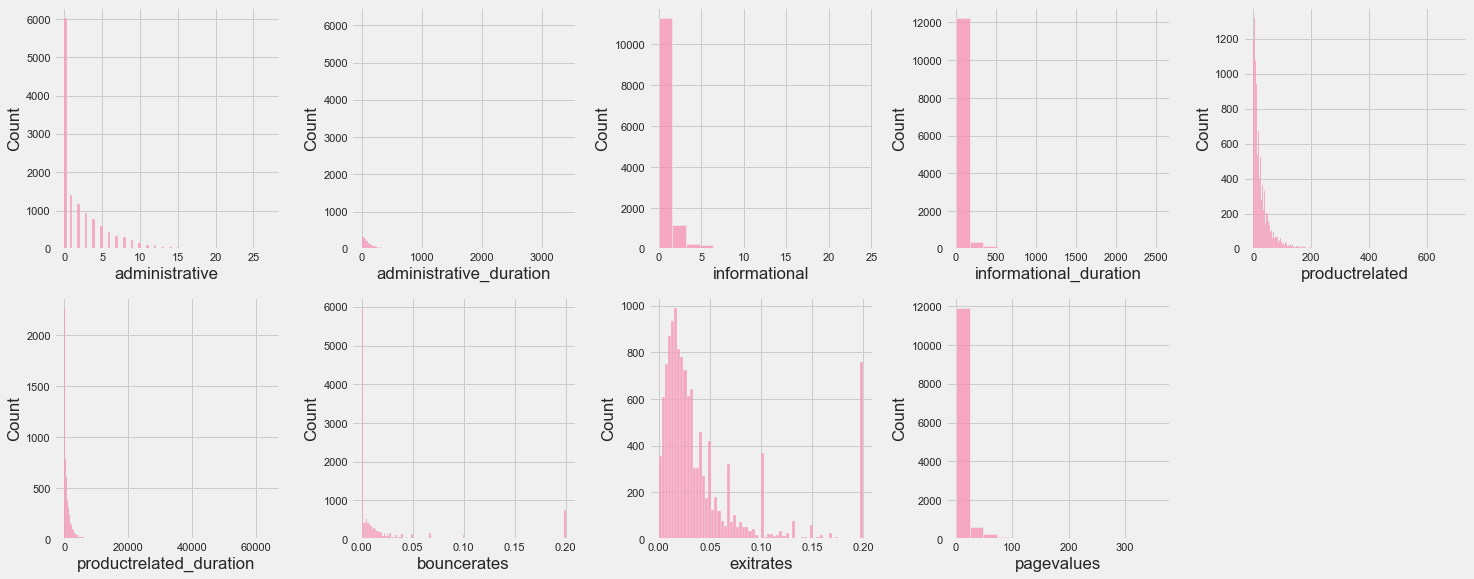

In [24]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.histplot(x=raw_ecommerce[nums[i]], color='#f78fb3')
plt.tight_layout()

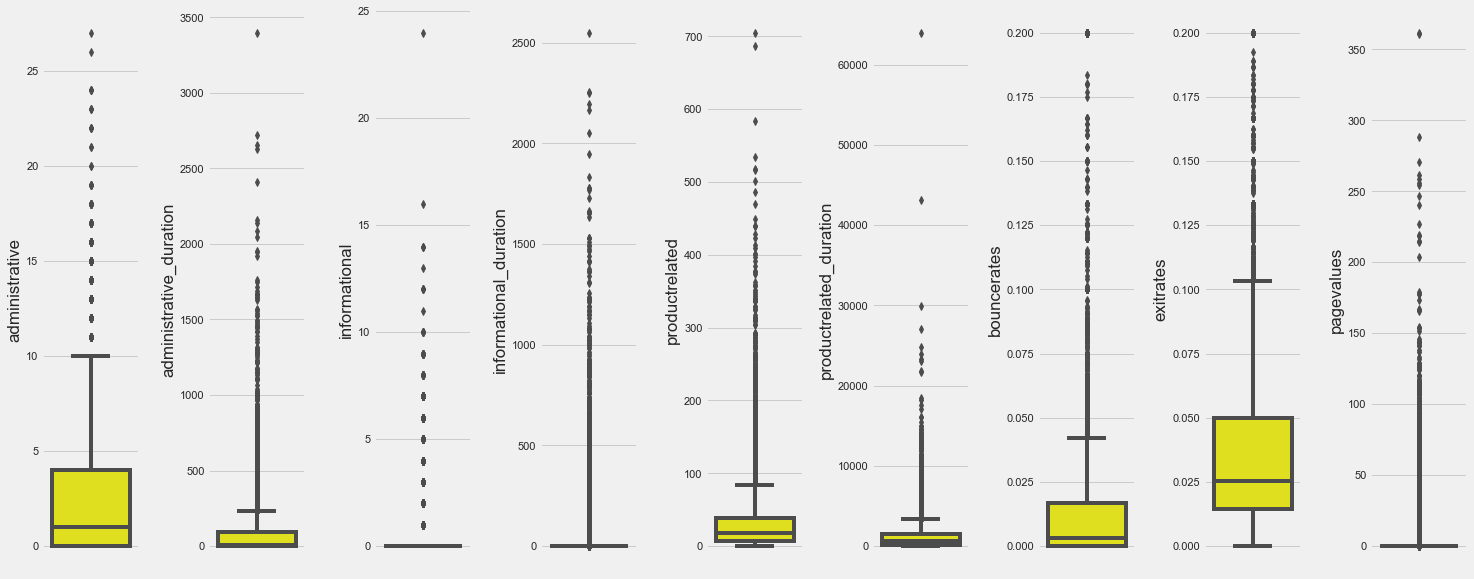

In [25]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(data=raw_ecommerce, y=nums[i], color='yellow')
plt.tight_layout()

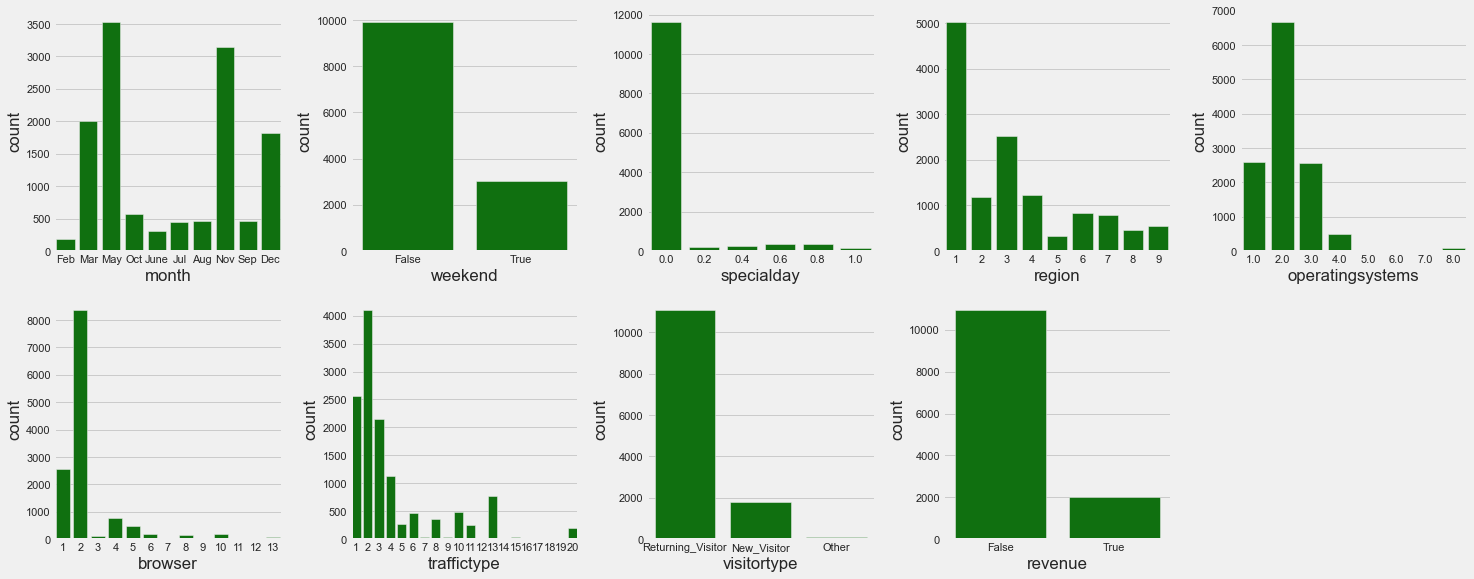

In [26]:
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=raw_ecommerce[cats[i]], color='green')
plt.tight_layout()

### 2. Univariate Analysis Insight
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

---
untuk kolom numerikal berikut ini memiliki distribusi positively skewed dan juga memiliki outlier:
- 'administrative'
- 'administrative_duration'
- 'informational'
- 'informational_duration'
- 'productrelated'
- 'productrelated_duration'
- 'bouncerates'
- 'exitrates'
- 'pagevalues'

Untuk tahap preprocessing dapat dilakukan, handling outlier dan feature transformation.

Untuk kolom kategorikal :
- 'month' : jumlah data didominasi bulan: May, Nov, Mar, Dec
- 'weekend' : didominasi oleh nilai 'False'
- 'specialday' : kunjungan situs mayoritas dilakukan saat, jauh dari specialday (hari khusus)
- 'region' : observasi menunjukan user region 1 mendominasi
- 'operatingsystem' : yang digunakan banyak user 2, 1, 3, 4
- 'browser' : jenis 2 mendominasi data dari 13 jenis browser
- 'traffictype' : jenis traffic yang paling banyak membawa user merupakan traffic 2, 1, 3
- 'visitortype' : kunjungan mayoritas dilakukan oleh returning_visitor
- 'revenue' : sebanyak 84.48% dari kunjungan tidak melakakukan pembelian / tidak menghasilkan pendapatan

Untuk kolom revenue sebagai target perlu dilakukan imbalances handling\
kolom visitortype dan month, dapat dilakukan feature encoding agar dapat dilakukan algoritma korelasi\

## Multivariate Analysis

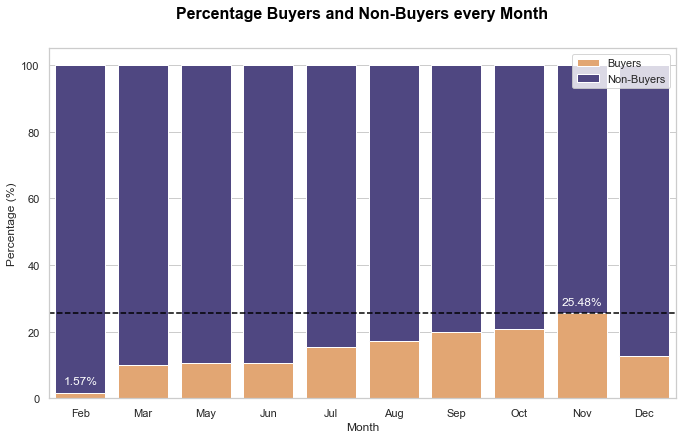

In [27]:
# groupby month
month_revenue       = raw_ecommerce.groupby(['month', 'revenue'])['revenue'].count().reset_index(name='count')

# ubah ke pivot
df_pivot = month_revenue.pivot_table(index='month', columns='revenue', values='count')
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['month', 'non buyer', 'buyer']

# sorted bulan agar berurutan
df_pivot.loc[df_pivot['month'] == 'June', 'month'] = 'Jun'
month_order = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_pivot['month'] = pd.Categorical(df_pivot['month'], categories=month_order, ordered=True)
df_pivot_sorted = df_pivot.sort_values(by='month')

# ubah month menjadi index
df_pivot_sorted.set_index('month', inplace=True)

# Menghitung total untuk setiap bulan
df_pivot_sorted['total'] = df_pivot_sorted['non buyer'] + df_pivot_sorted['buyer']

# Menghitung persentase untuk setiap kategori (False dan True)
df_pivot_sorted['non buyer_percent'] = (df_pivot_sorted['non buyer'] / df_pivot_sorted['total']) * 100
df_pivot_sorted['buyer_percent'] = (df_pivot_sorted['buyer'] / df_pivot_sorted['total']) * 100

# Menggambar stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['buyer_percent'], color='SandyBrown', label='Buyers')
sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['non buyer_percent'], bottom=df_pivot_sorted['buyer_percent'], color='DarkSlateBlue', label='Non-Buyers')

plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Percentage Buyers and Non-Buyers every Month', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

#adding horizontal line
plt.axhline(y=df_pivot_sorted.loc['Nov','buyer_percent'],color='Black',ls='--')

#adding text
plt.text(8, df_pivot_sorted.loc['Nov', 'buyer_percent'] + 2, '25.48%', ha='center', va='bottom', color='White')
plt.text(0, df_pivot_sorted.loc['Feb', 'buyer_percent'] + 2, '1.57%', ha='center', va='bottom', color='White')

plt.legend()

plt.show()

In [28]:
df_pivot

,month,non buyer,buyer
0,Aug,382,79
1,Dec,1588,228
2,Feb,188,3
3,Jul,381,70
4,Jun,275,33
5,Mar,1796,201
6,May,3154,379
7,Nov,2348,803
8,Oct,455,119
9,Sep,371,93


Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan **November** `25,48% Revenue Rate`, Sementara bulan **Februari** memiliki kunjungan yang menghasilkan revenue yang paling sedikit `1.57% Revenue Rate` (3 buyer). 

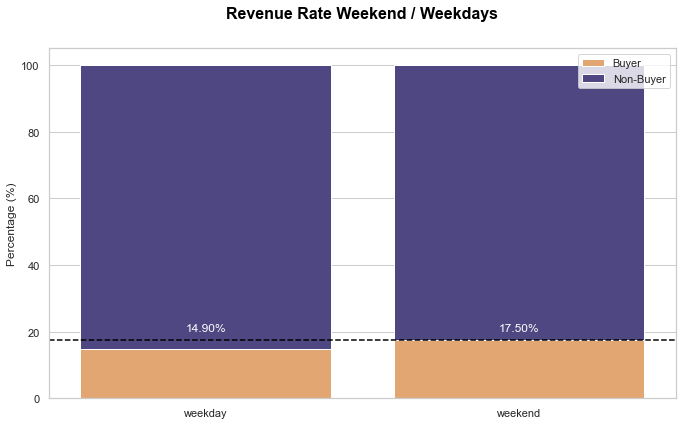

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm

weekend_revenue = raw_ecommerce.groupby(['weekend', 'revenue'])['revenue'].count().reset_index(name='count')
weekend_revenue['weekend'] = weekend_revenue['weekend'].map({False: 'weekday', True: 'weekend'})
weekend_revenue['revenue'] = weekend_revenue['revenue'].map({False: 'Non-Buyer', True: 'Buyer'})

# creating pivot table
weekend_revenue_pivot = weekend_revenue.pivot_table(index='weekend', columns='revenue', values='count')

#changing names
weekend_revenue_pivot.columns = ['Buyers','Non-Buyers']

# adding column total customer
weekend_revenue_pivot['total'] = weekend_revenue_pivot.sum(axis=1)

# Calculate revenue rate for weekends and weekdays
weekend_revenue_pivot['buyer_pct'] = weekend_revenue_pivot['Buyers'] / weekend_revenue_pivot['total'] * 100
                                                                         
weekend_revenue_pivot['non_buyer_pct'] = weekend_revenue_pivot['Non-Buyers'] /  weekend_revenue_pivot['total'] * 100

# Creating stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=weekend_revenue_pivot.index, y=weekend_revenue_pivot['buyer_pct'], color='SandyBrown', label='Buyer')
sns.barplot(x=weekend_revenue_pivot.index, y=weekend_revenue_pivot['non_buyer_pct'], bottom=weekend_revenue_pivot['buyer_pct'],\
            color='DarkSlateBlue', label='Non-Buyer')

plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Revenue Rate Weekend / Weekdays', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

#adding horizontal line
plt.axhline(y=weekend_revenue_pivot.loc['weekend','buyer_pct'],color='Black',ls='--')

#adding text
#adding text
plt.text(1, weekend_revenue_pivot.loc['weekend','buyer_pct'] + 2, '17.50%', ha='center', va='bottom', color='White')
plt.text(0, weekend_revenue_pivot.loc['weekend','buyer_pct'] + 2, '14.90%', ha='center', va='bottom', color='White')

plt.legend()

plt.show()

In [30]:
weekend_revenue_pivot

,Buyers,Non-Buyers,total,buyer_pct,non_buyer_pct
weekend,,,,,
weekday,1480,8449,9929,14.905831,85.094169
weekend,528,2489,3017,17.500829,82.499171


Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate weekend > weekday `17.5% /14.9%`

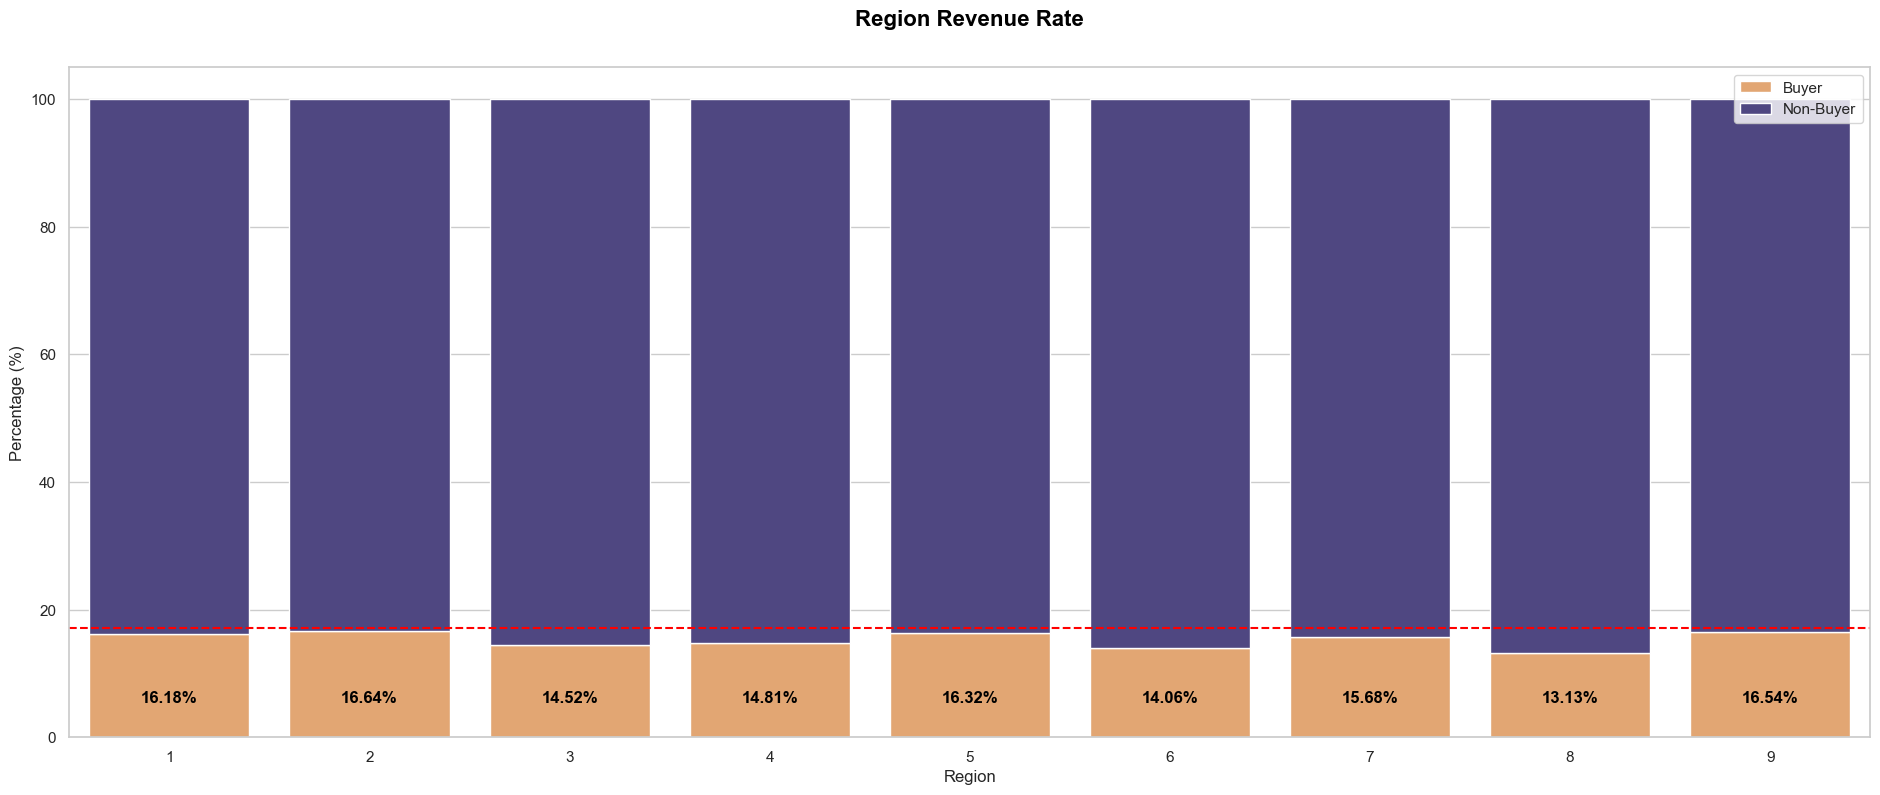

In [32]:

region_revenue    = raw_ecommerce.groupby(['region','revenue'])['revenue'].count().reset_index(name='count')
reg_pivot         = region_revenue.pivot_table(index='region',columns='revenue', values='count')
reg_pivot.columns = ['Non-Buyer','Buyer']

#calculate revenue rate by region
reg_pivot_pct = reg_pivot.div(reg_pivot.sum(axis=1), axis=0) * 100
reg_pivot_pct = reg_pivot_pct[['Buyer','Non-Buyer']]

# plotting
sns.barplot(x=reg_pivot_pct.index, y=reg_pivot_pct['Buyer'], color='SandyBrown', label='Buyer')
sns.barplot(x=reg_pivot_pct.index, y=reg_pivot_pct['Non-Buyer'], bottom=reg_pivot_pct['Buyer'],\
            color='DarkSlateBlue', label='Non-Buyer')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Region Revenue Rate', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)
plt.xticks(rotation=0)

# Add legend
plt.legend()

# add horizontal line
plt.axhline(y=reg_pivot_pct.loc[2,'Buyer'] +.5,color='Red',ls='--')

# Add percentages on top of each bar
for index, value in enumerate(reg_pivot_pct['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%',weight='bold', ha='center', va='bottom', color='Black')


# Display the chart
plt.show()

In [32]:
reg_pivot.sum(axis=1)

region
1    5031
2    1190
3    2528
4    1229
5     337
6     839
7     797
8     457
9     538
dtype: int64

Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 2 (16.64%) menjadi paling tinggi diantara region lainnya.

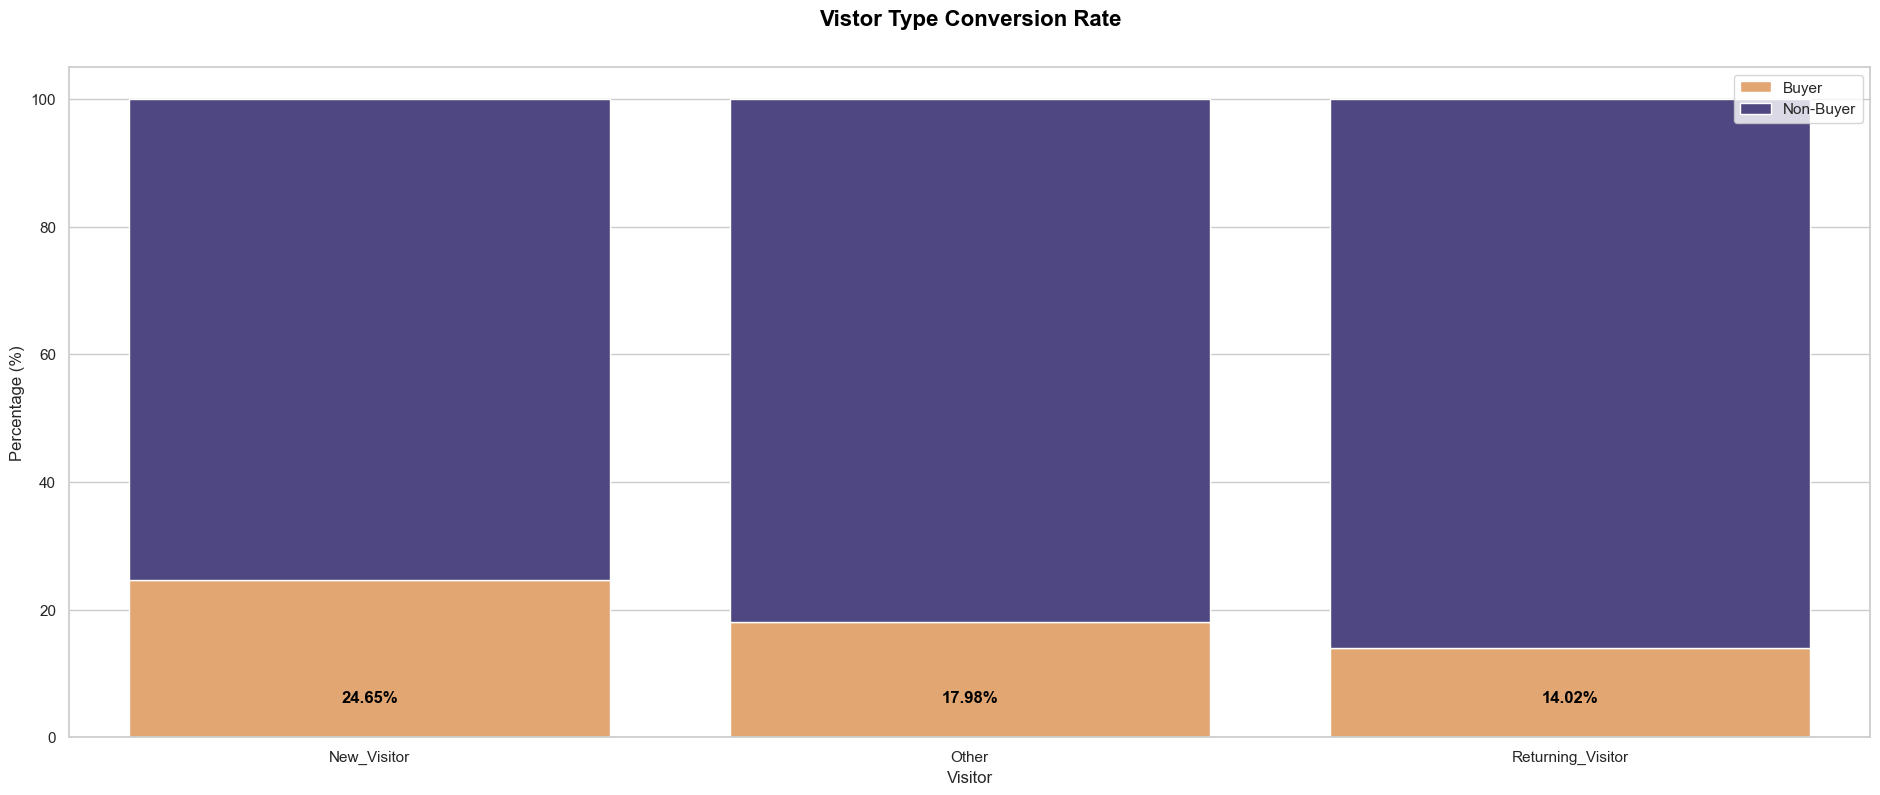

In [16]:
#Group df
visitor_df            = raw_ecommerce.groupby(['visitortype', 'revenue'])\
                        ['revenue'].count().reset_index(name='cnt').sort_values(by='cnt',ascending=False)
visitor_pivot         = visitor_df.pivot_table(index='visitortype',columns='revenue', values='cnt')
visitor_pivot.columns = ['Non-Buyer','Buyer']
visitor_pivot         = visitor_pivot[['Buyer','Non-Buyer']]
visitor_rev_pct       = visitor_pivot.div(visitor_pivot.sum(axis=1), axis=0)*100

#Plot
sns.barplot(x=visitor_rev_pct.index, y=visitor_rev_pct['Buyer'], color='SandyBrown', label='Buyer')
sns.barplot(x=visitor_rev_pct.index, y=visitor_rev_pct['Non-Buyer'], bottom=visitor_rev_pct['Buyer'],\
            color='DarkSlateBlue', label='Non-Buyer')

# Add labels and title
plt.xlabel('Visitor')
plt.ylabel('Percentage (%)')
plt.title('Vistor Type Conversion Rate', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)
plt.xticks(rotation=0)

# Add legend
plt.legend()


#Add percentages on top of each bar
for index, value in enumerate(visitor_rev_pct['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%',weight='bold', ha='center', va='bottom', color='Black')


# Display the chart
plt.show()

In [34]:
visitor_rev_pct

,Buyer,Non-Buyer
visitortype,,
New_Visitor,24.649860,75.350140
Other,17.977528,82.022472
Returning_Visitor,14.017341,85.982659


Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa

Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi `24.65%`.

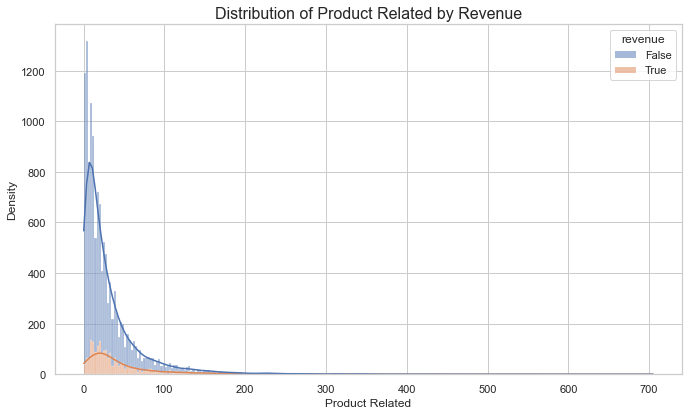

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for 'productrelated'
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_ecommerce, x='productrelated', hue='revenue', kde=True, multiple='stack')

plt.xlabel('Product Related')
plt.ylabel('Density')
plt.title('Distribution of Product Related by Revenue', fontsize=16)

#plt.legend(title='Revenue')

plt.show()

In [36]:
#grouping df based on revenue and agregating page type mean
page_cnt = raw_ecommerce.groupby(['revenue'])[['administrative','informational','productrelated']].mean().reset_index()

#change revenue column value
page_cnt.loc[page_cnt['revenue']==True, 'revenue'] = 'Buyer'
page_cnt.loc[page_cnt['revenue']==False, 'revenue'] = 'Non-Buyer'
page_cnt =  page_cnt[['revenue','productrelated','administrative','informational']]

page_cnt

,revenue,productrelated,administrative,informational
0,Non-Buyer,28.676632,2.103486,0.447065
1,Buyer,47.895916,3.393879,0.780876


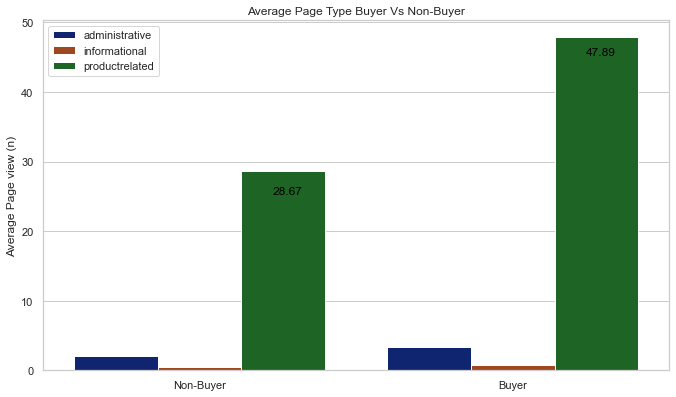

In [37]:
#creating melted df for visualization
melted_pagetype = page_cnt.melt(id_vars='revenue', value_vars=['administrative','informational','productrelated'],\
                            var_name='PageType', value_name='Value')

#plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_pagetype, x='revenue', y='Value', hue='PageType', palette='dark')
plt.xlabel('')
plt.ylabel('Average Page view (n)')
plt.legend(loc='upper left')
plt.title('Average Page Type Buyer Vs Non-Buyer') 

#adding text
plt.text(0+.33, 25, '28.67', ha='right', va='bottom', color='Black')
plt.text(1+.33, 45, '47.89', ha='right', va='bottom', color='Black')
plt.show()

In [38]:
melted_pagetype

,revenue,PageType,Value
0,Non-Buyer,administrative,2.103486
1,Buyer,administrative,3.393879
2,Non-Buyer,informational,0.447065
3,Buyer,informational,0.780876
4,Non-Buyer,productrelated,28.676632
5,Buyer,productrelated,47.895916


Barplot menunjukan bahwa pengunjung yang memutuskan untuk melakukan pembelian **Buyer**, memiliki nilai rata-rata yang lebih tinggi dari **Non-Buyer**. dalam melihat halaman productrelated 

In [19]:
pg_val_rev_true = raw_ecommerce[(raw_ecommerce['pagevalues'] >0) & (raw_ecommerce['revenue'] == True)]['revenue'].count()
pg_nonval_rev_true = raw_ecommerce[(raw_ecommerce['pagevalues'] == 0) & (raw_ecommerce['revenue'] == True)]['revenue'].count()
pg_val_rev_false = raw_ecommerce[(raw_ecommerce['pagevalues'] >0) & (raw_ecommerce['revenue'] == False)]['revenue'].count()
pg_nonval_rev_false = raw_ecommerce[(raw_ecommerce['pagevalues'] == 0) & (raw_ecommerce['revenue'] == False)]['revenue'].count()

# Creating dictionary
pg_rev_data = {
    'Session count of page value = 0': [pg_nonval_rev_true, pg_nonval_rev_false],
    'Session count of page value > 0': [pg_val_rev_true, pg_val_rev_false]}

# Creating the DataFrame
pg_rev = pd.DataFrame(pg_rev_data, index=['Buyer', 'Non-Buyer'])
pg_rev

,Session count of page value = 0,Session count of page value > 0
Buyer,392,1616
Non-Buyer,9691,1247


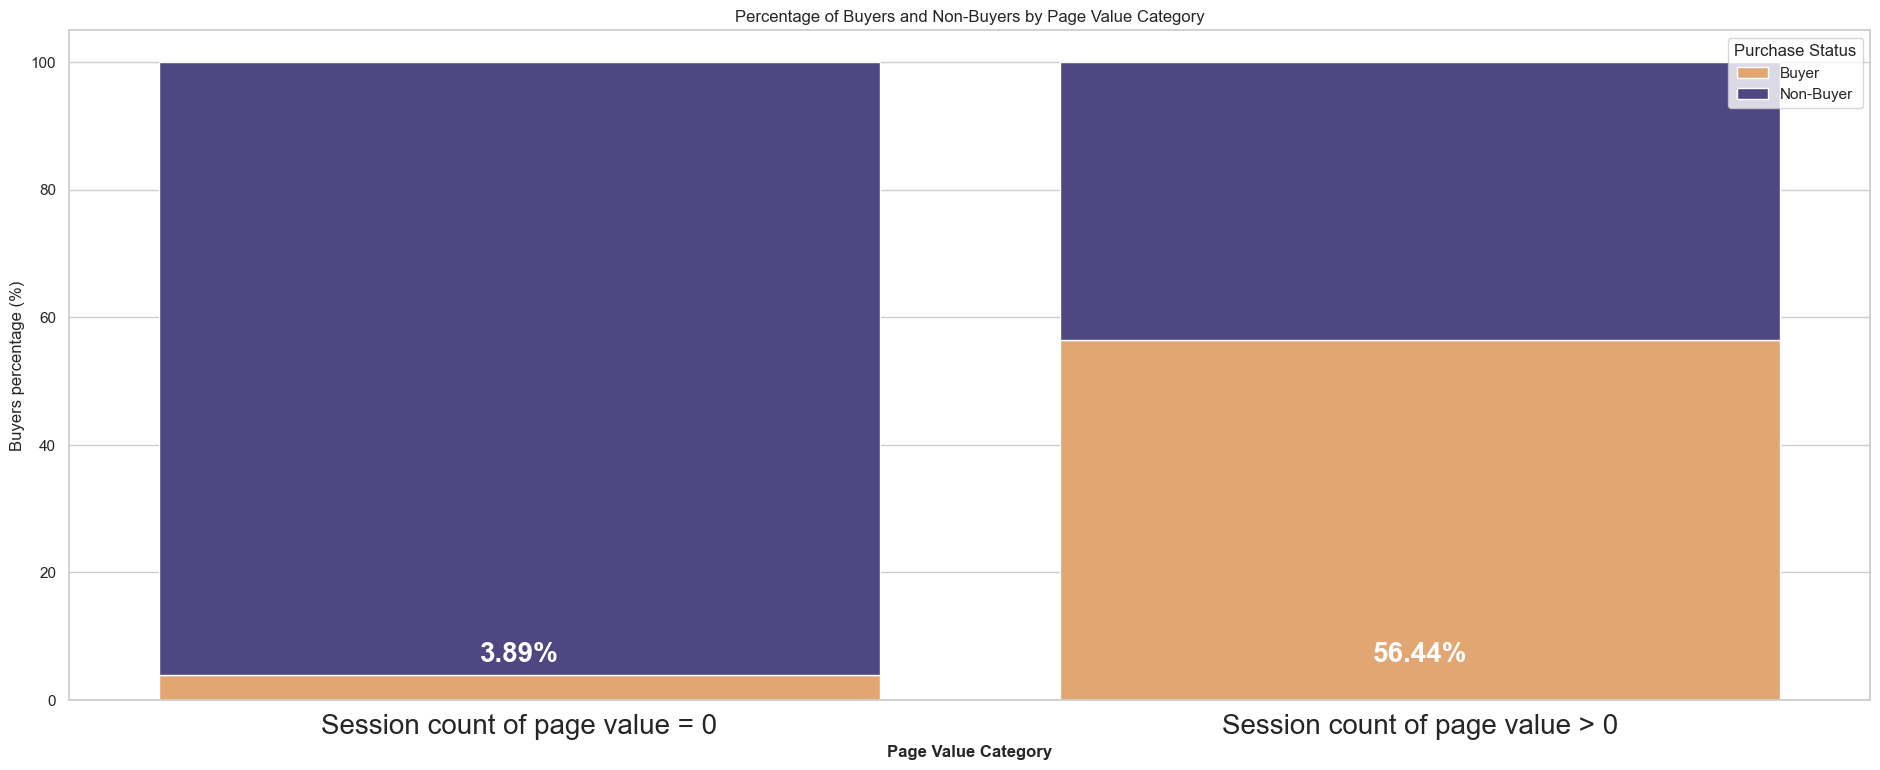

In [25]:
# Calculate the percentages across the columns
pg_rev_percent = (pg_rev.div(pg_rev.sum(axis=0), axis=1) * 100).T

# Plotting
sns.barplot(x=pg_rev_percent.index, y=pg_rev_percent['Buyer'], color='SandyBrown', label='Buyer')
sns.barplot(x=pg_rev_percent.index, y=pg_rev_percent['Non-Buyer'], bottom=pg_rev_percent['Buyer'],
            color='DarkSlateBlue', label='Non-Buyer')

# Adjusting the legend to the upper right
plt.legend(title='Purchase Status', loc='upper right')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

# Adding labels and title
plt.xlabel('Page Value Category',fontweight='bold')
plt.ylabel('Buyers percentage (%)')
plt.title('Percentage of Buyers and Non-Buyers by Page Value Category')
plt.xticks(fontsize=20)

#adding percentage
for index, value in enumerate(pg_rev_percent['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='White',fontsize=20, fontweight='bold')

# Show the plot
plt.show()

In [41]:
pg_rev_percent

,Buyer,Non-Buyer
Session count of page value = 0,3.887732,96.112268
Session count of page value > 0,56.444289,43.555711


Dalam pembelian ketika session melibatkan pagevalues > 0 purchase rate tinggi `56.44%`. Sebaliknya, sesi dengan pagevalues nol menunjukkan purchase rate yang lebih rendah `3.88%`. 

In [42]:
kor = nums +['weekend', 'specialday', 'region', 'operatingsystems', 'browser', 'traffictype', 'revenue']

<AxesSubplot:>

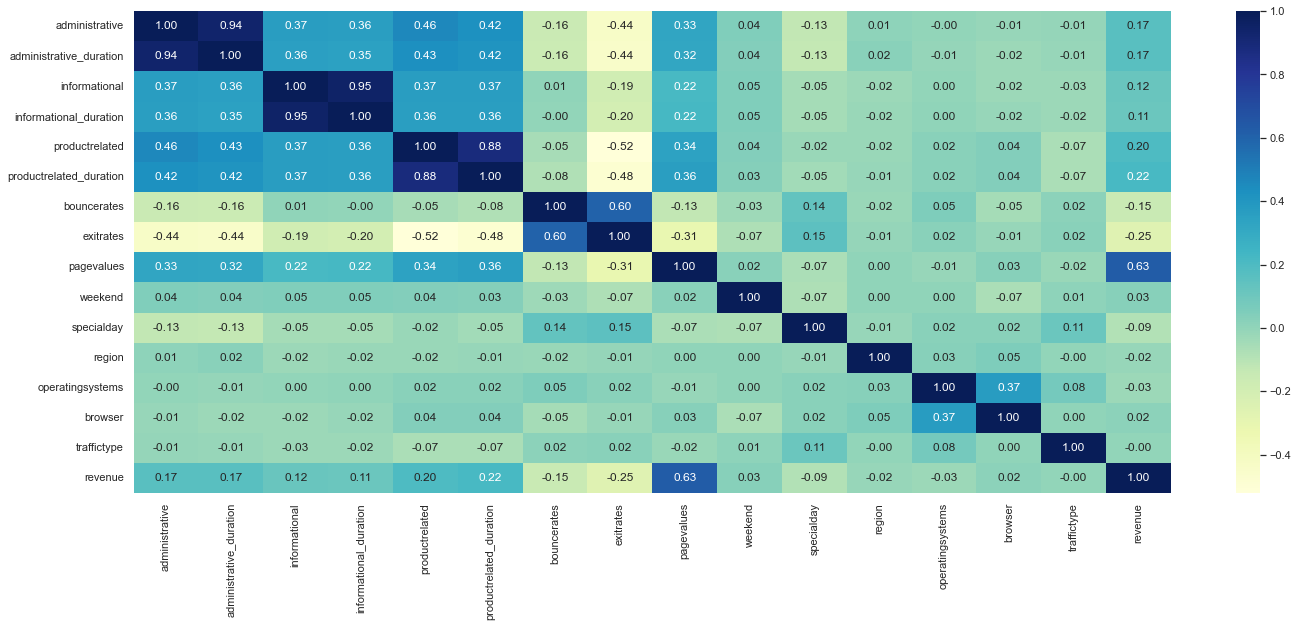

In [43]:
#spearman correlation method
sns.heatmap(raw_ecommerce[kor].corr(method='spearman'), cmap='YlGnBu',annot=True,fmt='.2f')

<AxesSubplot:>

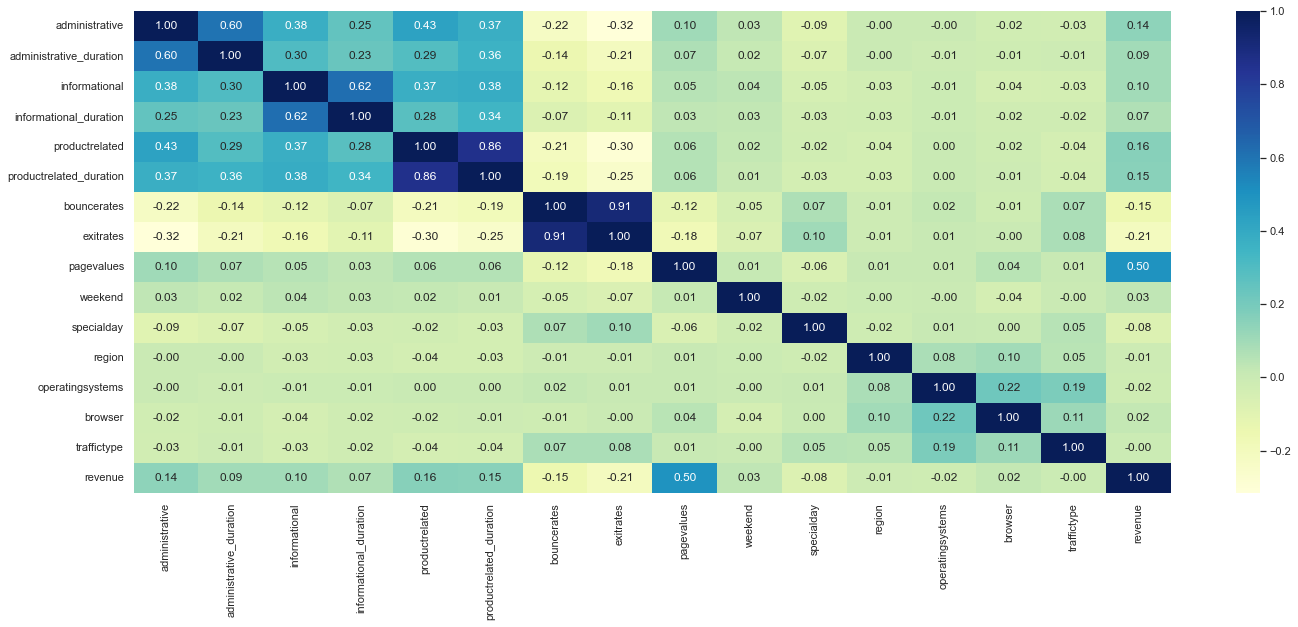

In [44]:
#pearson correlation method
sns.heatmap(raw_ecommerce[kor].corr(), cmap='YlGnBu',annot=True,fmt='.2f')

### 3. Multivariate Analysis Insight

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
- A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

---
#### 3A.
fitur :
- productrelated_duration
- administrative
- exitrates
- pagevalues

memiliki korelasi dengan target

`pagevalues` menjadi fitur yang memiliki korelasi sangat relevan dengan target (0.63)


#### 3B.
berdasarkan hasil korelasi heatmap yang ditampilkan, terdapat korelasi yang tinggi antara fitur :<br>
- productrelated dengan productrelated_duration (0.88)
- administrative dengan administrative_duration (0.94)
- informational dengan informational_duration   (0.95)
- bounce_rates dengan exitrates                 (0.60)
- operatingsystem dengan browser                (0.37)
<br>

maka antara salah satu fitur yang berkorelasi tinggi, akan di drop berdasarkan korelasi yang rendah terhadap target **revenue**.

fitur **pagevalues** memiliki korelasi yang tinggi/*relevan* terhadap target. sebesar (0.63)

ada kemungkinan fitur month dan visitortype berkorelasi tinggi terhadap target, maka perlu encoding untuk tahap preprocessing dan melihat korelasinya

### 4. Business Insight & Reccomendation



**Insight**

- Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 2 `16.64%` menjadi paling tinggi diantara region lainnya.

- Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan November `25,48%` Revenue Rate, Sementara bulan Februari memiliki kunjungan yang menghasilkan revenue yang paling sedikit `1.57%` Revenue Rate (3 buyer).

- Bulan May memiliki kunjungan yang paling banyak diantara yang lain terdapat total kunjungan 3533 akan tetapi, hanya 379 dari total kunjungan yang menghasilkan revenue.

- Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate weekend > weekday `17.5% /14.9%`

- Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi `24.65%`.

- Pengunjung yang memutuskan untuk melakukan pembelian **Buyer**, memiliki nilai rata-rata yang lebih tinggi dari **Non-Buyer**. dalam melihat halaman productrelated `47.89 / 28.67` .

- ketika session melibatkan pagevalues > 0 purchase rate tinggi `56.44%`. Sebaliknya, sesi dengan pagevalues nol menunjukkan purchase rate yang lebih rendah `3.88%`.
---

**Business Recommendation**

- untuk region yang masih rendah nilai revenue_rate nya, tim marketing dapat menampilkan halaman web yang memiliki pagavalues > 0, dan juga menampilkan rekomendasi yang relevan dengan halaman web yang yang dikunjungi user (product related). strategi marketing tersebut dapat dilakukan pada weekend, dikarenakan disaat weekend revenue_rate lebih tinggi dibandingkan weekday. maka hal ini dapat membantu meningkatkan revenue platform e-commerce.

---

**Metrics**

- Revenue

# Data Preprocessing

In [32]:
clean_data = raw_ecommerce.copy()

### Handle Missing Value

In [33]:
import pandas as pd

def info_missing_value(data):
    """
    Calculate missing data statistics and return the missing data DataFrame along with the length of the input DataFrame.

    Parameters:
        data (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
        pandas.DataFrame: A DataFrame containing the missing data statistics, including the data length in the last row.
    """

    # Calculate the total count of missing values for each column
    total = data.isna().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

    missing_data = pd.DataFrame(total, columns=['Total'])
    missing_data['Percent'] = percent

    # Remove the percentage calculation for data length
    missing_data = missing_data[missing_data.index != 'Data Length']

    # Add a row for data length
    missing_data = pd.concat([pd.DataFrame([[len(data), None]], columns=['Total', 'Percent'], index=['Data Length']), missing_data])

    return missing_data

info_missing_value(clean_data)

C:\Users\masha\AppData\Local\Temp\ipykernel_13228\2874033504.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_data = pd.concat([pd.DataFrame([[len(data), None]], columns=['Total', 'Percent'], index=['Data Length']), missing_data])


,Total,Percent
Data Length,12946,NaN
productrelated_duration,639,4.935888
administrative_duration,633,4.889541
operatingsystems,524,4.047582
administrative,111,0.857408
bouncerates,74,0.571605
weekend,0,0.000000
visitortype,0,0.000000
traffictype,0,0.000000
region,0,0.000000


In [34]:
clean_data

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0.0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941,0.0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,Nov,3.0,2,1,13,Returning_Visitor,False,False
12942,0.0,0.000000,0,0.0,59,1309.658333,0.017241,0.030879,0.0,0.0,Dec,3.0,2,3,1,Returning_Visitor,False,False
12943,14.0,484.461579,2,14.0,33,898.491579,0.004269,0.034661,0.0,0.0,Sep,1.0,8,1,3,Returning_Visitor,False,False
12944,3.0,60.833333,0,0.0,18,884.633333,0.021053,0.041140,0.0,0.0,Mar,2.0,2,3,10,Returning_Visitor,False,False


In [35]:
# handle missing value by filling nan with respective median
null_feature = ['productrelated_duration', 'administrative_duration', 'operatingsystems', 'administrative', 'bouncerates']

clean_data[null_feature] = clean_data[null_feature].fillna(clean_data[null_feature].median())

info_missing_value(clean_data)

C:\Users\masha\AppData\Local\Temp\ipykernel_13228\2874033504.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_data = pd.concat([pd.DataFrame([[len(data), None]], columns=['Total', 'Percent'], index=['Data Length']), missing_data])


,Total,Percent
Data Length,12946,NaN
administrative,0,0.0
administrative_duration,0,0.0
weekend,0,0.0
visitortype,0,0.0
traffictype,0,0.0
region,0,0.0
browser,0,0.0
operatingsystems,0,0.0
month,0,0.0


### Handle Duplicate Data

In [36]:
def handle_duplicates(data):
    """
    Handles duplicates in a given DataFrame by dropping them and returns the sum of duplicated data,
    the data length before handling duplicates, and the data length after handling duplicates.

    Args:
        data: A pandas DataFrame representing the dataset.

    Returns:
        A tuple containing the following elements:
        - duplicates_sum (int): The sum of duplicated data.
        - data_length_before (int): The length of the dataset before handling duplicates.
        - data_length_after (int): The length of the dataset after handling duplicates.
    """
    data_length_before = len(data)
    data.drop_duplicates(inplace=True)
    data_length_after = len(data)
    duplicates_sum = data_length_before - data_length_after
    
    return (f'Duplicate :{duplicates_sum}', f'Origin Length :{data_length_before}', f'Droped Duplicate Length :{data_length_after}')

In [37]:
handle_duplicates(clean_data)

('Duplicate :717', 'Origin Length :12946', 'Droped Duplicate Length :12229')

In [38]:
clean_data.duplicated().sum()

0

### Split Data

In [39]:
# split data. features to x, target to y
x = clean_data.drop(columns='revenue').copy()
y = clean_data['revenue'].copy()

### Train Test Split

In [40]:
# splitting data to train and test data
from sklearn.model_selection import train_test_split

#train_size = 0.8
#train_index = int(len(clean_data) * train_size)
#train_df, test_df = clean_data.iloc[:train_index], clean_data.iloc[train_index:]

#print(train_df.shape)
#print(test_df.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(9783, 17)
(2446, 17)


In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12229 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12229 non-null  float64
 1   administrative_duration  12229 non-null  float64
 2   informational            12229 non-null  int64  
 3   informational_duration   12229 non-null  float64
 4   productrelated           12229 non-null  int64  
 5   productrelated_duration  12229 non-null  float64
 6   bouncerates              12229 non-null  float64
 7   exitrates                12229 non-null  float64
 8   pagevalues               12229 non-null  float64
 9   specialday               12229 non-null  float64
 10  month                    12229 non-null  object 
 11  operatingsystems         12229 non-null  float64
 12  browser                  12229 non-null  int64  
 13  region                   12229 non-null  int64  
 14  traffictype              12

### Outliers

From the graphs generated below, we can see that almost all numeric columns have outliers. Before removing the outliers, considering that the distribution of these columns is right skewed, we can try normalizing them using the log transformation.

In [42]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9783 entries, 8413 to 7340
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           9783 non-null   float64
 1   administrative_duration  9783 non-null   float64
 2   informational            9783 non-null   int64  
 3   informational_duration   9783 non-null   float64
 4   productrelated           9783 non-null   int64  
 5   productrelated_duration  9783 non-null   float64
 6   bouncerates              9783 non-null   float64
 7   exitrates                9783 non-null   float64
 8   pagevalues               9783 non-null   float64
 9   specialday               9783 non-null   float64
 10  month                    9783 non-null   object 
 11  operatingsystems         9783 non-null   float64
 12  browser                  9783 non-null   int64  
 13  region                   9783 non-null   int64  
 14  traffictype              9

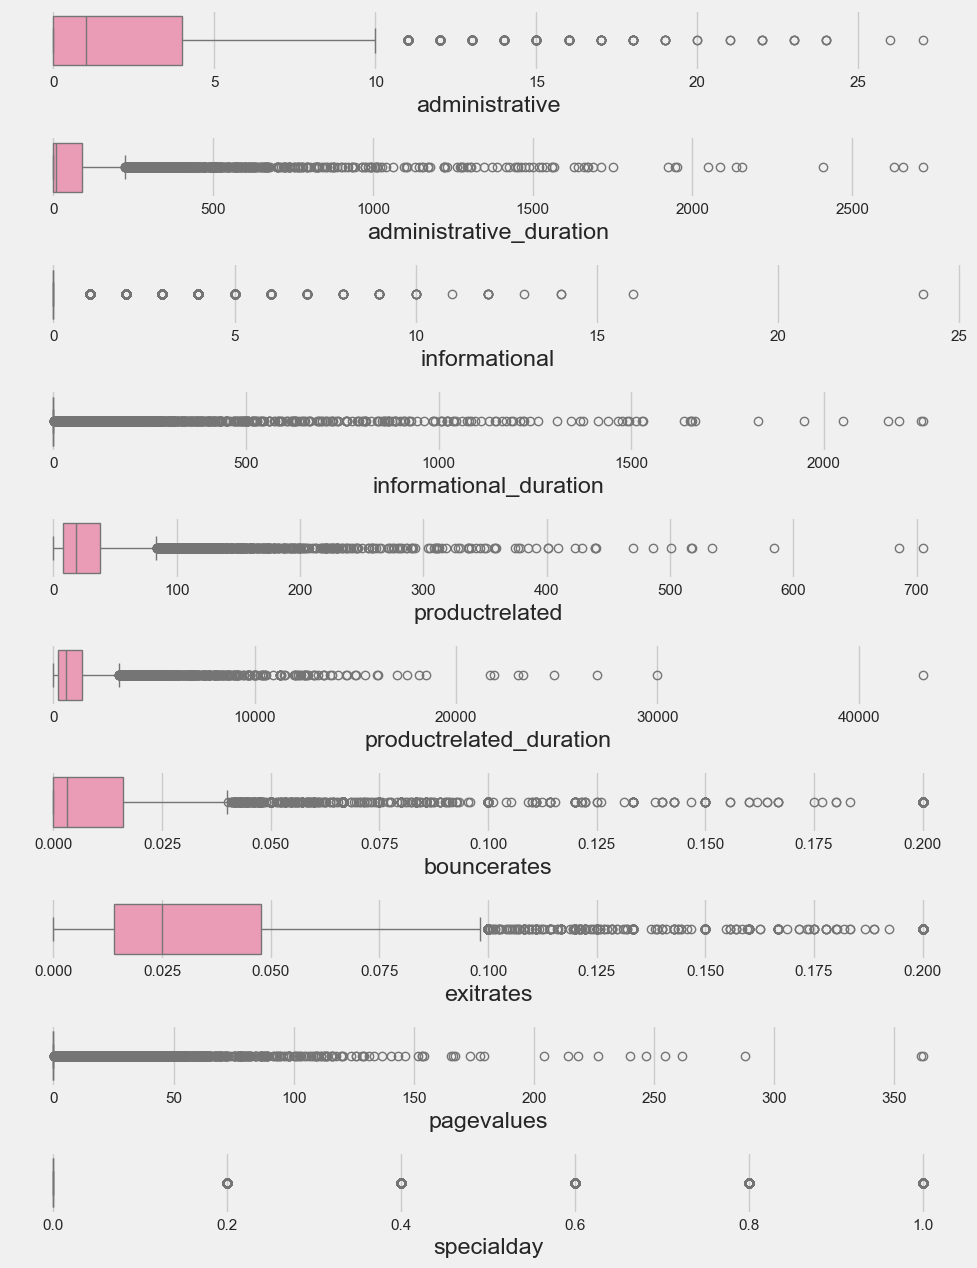

In [43]:
# separating data type features
numerical_feature   = ['administrative','administrative_duration','informational','informational_duration',
                       'productrelated','productrelated_duration','bouncerates','exitrates','pagevalues','specialday']

categorical_feature = ['month','operatingsystems','browser','region','traffictype','visitortype','weekend']

# defining function to check boxplot of the data 
def plot_outliner(data, feat):
    plt.figure(figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)
    for i in range(0, len(feat)):
        plt.subplot(12, 1, i+1)
        sns.boxplot(x=data[numerical_feature[i]], color='#f78fb3', linewidth=1)
        plt.xlabel(numerical_feature[i])
    plt.tight_layout()

plot_outliner(x_train, numerical_feature)

All features in `x_train` that are numerical type, have outliers. for `pagevalues` outliers wont be handled, because it's a special case it might have useful information for model

In [44]:
numerical_feature

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday']

In [45]:
outlier_features = ['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'specialday']

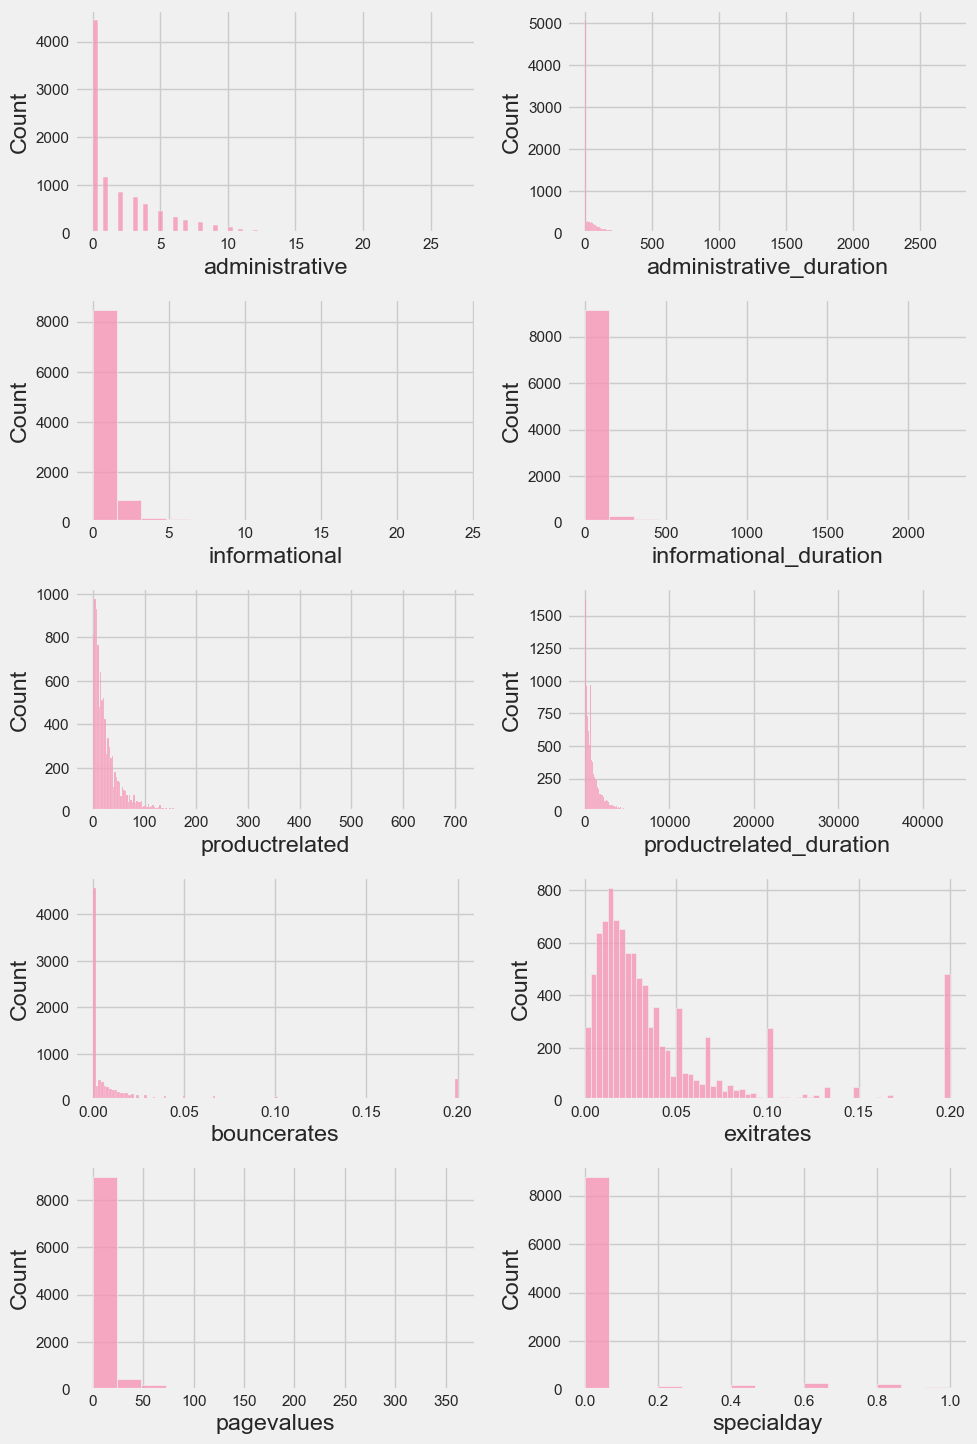

In [46]:
#Distribution
def plot_distribution(data, feat):
    plt.figure(figsize=(10, 20))
    features = feat
    for i in range(0, len(features)):
        plt.subplot(7, 2, i+1)
        sns.histplot(x=data[features[i]], color='#f78fb3')
        plt.xlabel(features[i])

    plt.tight_layout()

plot_distribution(x_train, numerical_feature)

#### Normalization Before Handling Outlier

In [47]:
numerical_feature

['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday']

In [48]:
import numpy as np

# Perform log transformation on numerical features in the training set
for num in numerical_feature:
    percentile_value = np.percentile(x_train[num], 5)
    min_value = max(percentile_value, 2)  # Choose the maximum of the 5th percentile or 2 as the minimum value
    x_train[num] = np.log(x_train[num] + (min_value / 2))
    # We need to ensure that the data is not zero before applying the log transformation.

# Perform log transformation on numerical features in the test set using parameters from the training set
for num in numerical_feature:
    percentile_value = np.percentile(x_train[num], 5)
    min_value = max(percentile_value, 2)  # Choose the maximum of the 5th percentile or 2 as the minimum value
    x_test[num] = np.log(x_test[num] + (min_value / 2))

Check Results

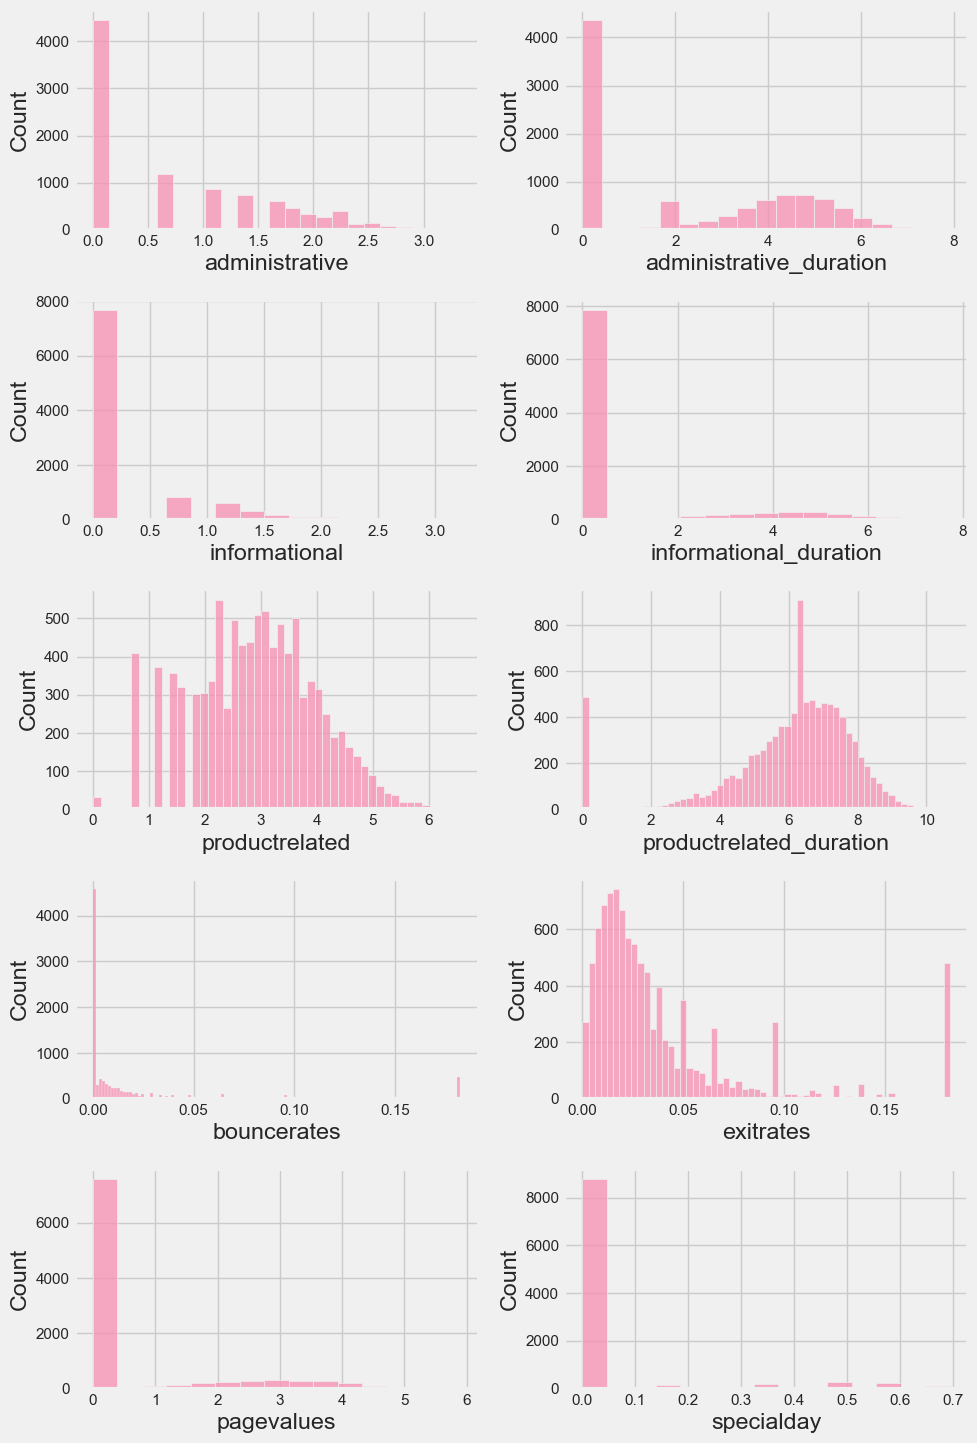

In [49]:
plot_distribution(x_train, numerical_feature)

After Normalization the features distribution appear quite normal. outlier handling can be proceeded

#### ZSCORE Outlier Handling

In [50]:
from scipy import stats

# zscore outlier handling
# creates function to remove outliers in x_train, and using the x_train parameter to remove corresponding data in y_train
def remove_outliers(x, y, features, exclude_feature=None):
    """
    Removes outliers from the input dataframe and target variable.

    Parameters:
        x (DataFrame): The input dataframe containing the features.
        y (Series): The target variable.
        features (list): List of feature names to check for outliers.
        exclude_feature (str or None, optional): The feature name to exclude from outlier removal.
            Defaults to None.

    Returns:
        DataFrame: The input dataframe with outliers removed.
        Series: The target variable with corresponding outliers removed.
    """
    if exclude_feature:
        nums = [num for num in features if num != exclude_feature]
    
    z_scores = stats.zscore(x[features])
    outlier_mask = np.abs(z_scores) <= 3
    filtered_x = x[outlier_mask.all(axis=1)]
    filtered_y = y[outlier_mask.all(axis=1)]
    return filtered_x, filtered_y

In [51]:
print("Before removing outlier: ", f'x_train length: {len(x_train)}',
     f'y_train length: {len(y_train)}')

# remove outliers
x_train, y_train = remove_outliers(x_train, y_train, outlier_features)

print("After removing outlier: ", f'x_train length: {len(x_train)}',
     f'y_train length: {len(y_train)}')

Before removing outlier:  x_train length: 9783 y_train length: 9783
After removing outlier:  x_train length: 8596 y_train length: 8596


#### Outlier Handling Results

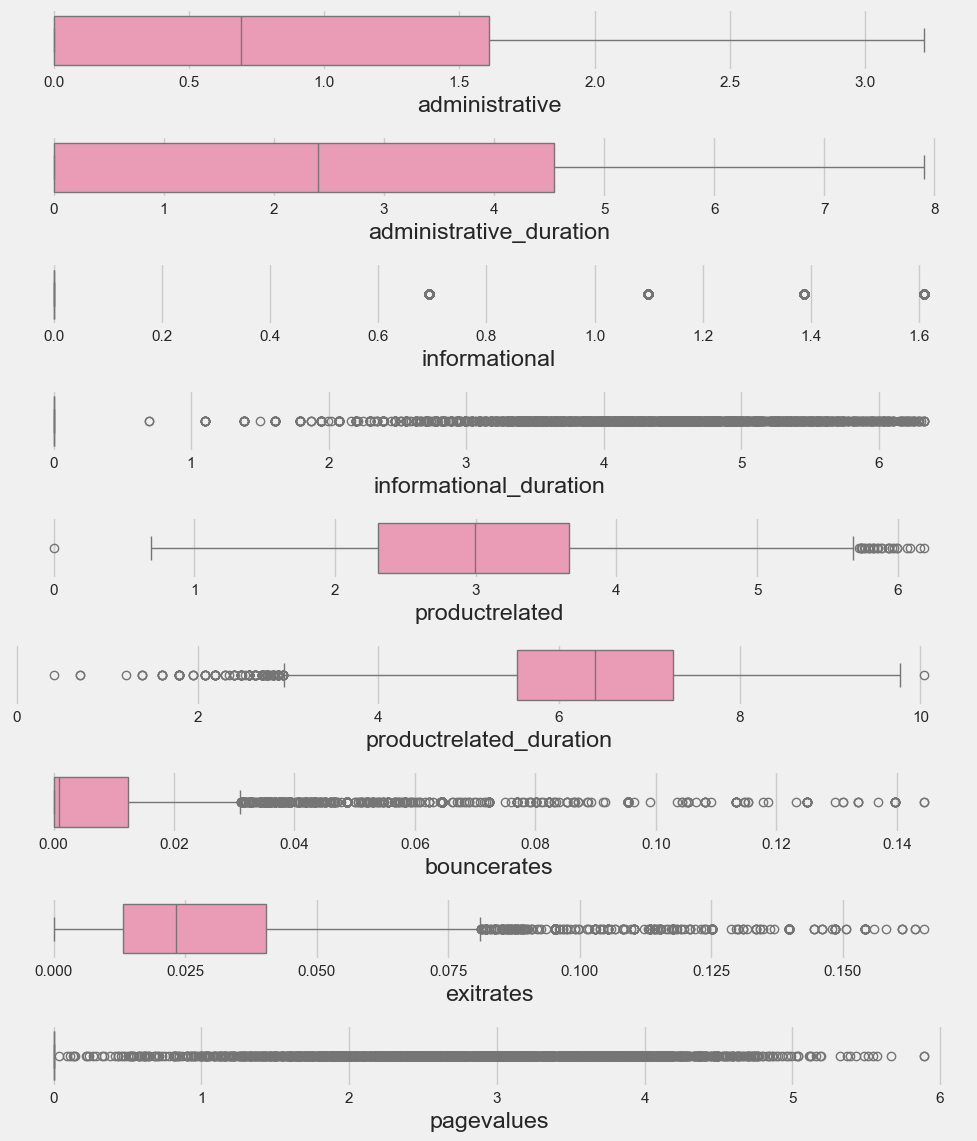

In [52]:
# checking the results
plot_outliner(x_train, outlier_features)

### Feature Encoding

Encode Categorical Feature after train_test_split. to prevent data leakage

In [53]:
categorical_feature

['month',
 'operatingsystems',
 'browser',
 'region',
 'traffictype',
 'visitortype',
 'weekend']

In [54]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical feature
categorical_feature = ['month','operatingsystems','browser','region',
                       'traffictype','visitortype','weekend']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Iterate over categorical features
for cat in categorical_feature:
    # Fit the encoder on the training data
    encoder.fit(x_train[cat].values.reshape(-1, 1))

    # Transform on the training set
    x_train_encoded = encoder.transform(x_train[cat].values.reshape(-1, 1))

    # Transform on the test set
    x_test_encoded = encoder.transform(x_test[cat].values.reshape(-1, 1))

    # Get the feature names for the encoded columns
    feature_names = encoder.get_feature_names_out([cat])

    # Create new DataFrames with encoded columns
    x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=feature_names, index=x_train.index)
    x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=feature_names, index=x_test.index)

    # Concatenate the encoded columns with the original dataframes
    x_train = pd.concat([x_train.drop(columns=[cat]), x_train_encoded_df], axis=1)
    x_test = pd.concat([x_test.drop(columns=[cat]), x_test_encoded_df], axis=1)

In [55]:
print(x_train.shape, x_test.shape)
x_train.info()

(8596, 73) (2446, 73)
<class 'pandas.core.frame.DataFrame'>
Index: 8596 entries, 8413 to 7340
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 8596 non-null   float64
 1   administrative_duration        8596 non-null   float64
 2   informational                  8596 non-null   float64
 3   informational_duration         8596 non-null   float64
 4   productrelated                 8596 non-null   float64
 5   productrelated_duration        8596 non-null   float64
 6   bouncerates                    8596 non-null   float64
 7   exitrates                      8596 non-null   float64
 8   pagevalues                     8596 non-null   float64
 9   specialday                     8596 non-null   float64
 10  month_Aug                      8596 non-null   float64
 11  month_Dec                      8596 non-null   float64
 12  month_Feb                   

### Feature Transformation

Transform numerical feature

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Fit the scaler on the training data
ss.fit(x_train[numerical_feature])

# Transform the training and test data using the fitted scaler
x_train[numerical_feature] = ss.transform(x_train[numerical_feature])
x_test[numerical_feature] = ss.transform(x_test[numerical_feature])

In [57]:
x_train[numerical_feature].describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday
count,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03,8.596000e+03
mean,2.810430e-17,1.587066e-16,9.505865e-18,1.239895e-17,2.178083e-16,-1.563301e-16,3.595697e-17,1.064244e-16,5.538200e-17,9.836504e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-9.864351e-01,-1.060860e+00,-4.765835e-01,-4.513174e-01,-2.995802e+00,-4.398539e+00,-5.369042e-01,-1.148340e+00,-5.104427e-01,-2.525029e-01
25%,-9.864351e-01,-1.060860e+00,-4.765835e-01,-4.513174e-01,-6.887871e-01,-5.858683e-01,-5.369042e-01,-6.723249e-01,-5.104427e-01,-2.525029e-01
50%,-1.701822e-01,-1.580008e-02,-4.765835e-01,-4.513174e-01,5.693637e-03,5.198915e-02,-4.909464e-01,-3.033454e-01,-5.104427e-01,-2.525029e-01
75%,9.088455e-01,9.215279e-01,-4.765835e-01,-4.513174e-01,6.748079e-01,6.954175e-01,9.949205e-02,3.164236e-01,-5.104427e-01,-2.525029e-01
max,2.804126e+00,2.386043e+00,3.250316e+00,3.422096e+00,3.204368e+00,2.761005e+00,6.869882e+00,4.859881e+00,3.976649e+00,4.714099e+00


### Feature Selection

In [58]:
# drop columns based on heatmap that are multicolinear
x_train.drop(columns=['administrative','informational_duration','productrelated'], inplace=True)

x_test.drop(columns=['administrative','informational_duration','productrelated'], inplace=True)

print(x_train.columns == x_test.columns)
print(x_train.shape, x_test.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
(8596, 70) (2446, 70)


In [59]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import random

def select_best_features(X, y, k=10):
    """
    Selects the top 'k' features from a dataframe based on their relevance to the target variable.

    Parameters:
        df (DataFrame)     : The input dataframe containing the features and target variable.
        target_column (str): The name of the target variable column.
        k (int, optional)  : The number of top features to select. Defaults to 10.

    Returns:
        list: A list of the best feature(s) based on their relevance to the target variable.
    """
    
    # Set the random seed
    random.seed(42)
    np.random.seed(42)
    
    # Perform feature selection using SelectKBest and f_classif
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)
    
    # Get the indices of the k best features
    best_feature_indices = selector.get_support(indices=True)
    
    # Get the names of the best features
    best_features = list(X.columns[best_feature_indices])
    
    return best_features

In [60]:
selected_feature = select_best_features(x_train, y_train, k=15)
selected_feature

['administrative_duration',
 'informational',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'month_Dec',
 'month_Nov',
 'month_Sep',
 'operatingsystems_2.0',
 'browser_2',
 'browser_7',
 'traffictype_1',
 'traffictype_3',
 'visitortype_Returning_Visitor']

In [61]:
def select_best_features_fc(X, y):
    class_labels = np.unique(y)
    fisher_scores = []
    
    for feature in X.columns:
        feature_values = X[feature]
        feature_fisher_score = 0
        
        for label in class_labels:
            class_mask = (y == label)
            feature_values_class = feature_values[class_mask]
            mean_diff = np.abs(np.mean(feature_values_class) - np.mean(feature_values))
            std_within_class = np.std(feature_values_class)
            
            if std_within_class == 0:  # Avoid division by zero
                continue
            
            fisher_score_class = (mean_diff ** 2) / std_within_class
            feature_fisher_score += fisher_score_class
        
        fisher_scores.append(round(feature_fisher_score, 2))
    
    return fisher_scores

In [62]:
fisher_score_result = select_best_features_fc(x_train, y_train)

In [63]:
feature_fc = pd.DataFrame({'Feature': x_train.columns, 'Fisher Score': fisher_score_result})
feature_fc.sort_values(by='Fisher Score', ascending=False, inplace=True)
print(feature_fc.head(10))

                          Feature  Fisher Score
5                      pagevalues          1.88
4                       exitrates          0.44
2         productrelated_duration          0.21
3                     bouncerates          0.20
0         administrative_duration          0.10
14                      month_Nov          0.04
1                   informational          0.04
6                      specialday          0.03
67  visitortype_Returning_Visitor          0.02
65        visitortype_New_Visitor          0.02


In [64]:
#Feature Selection Using Mutual Info Methode
x_train_selected = x_train[selected_feature]

### Class imbalances

In [65]:
target_count

NameError: name 'target_count' is not defined

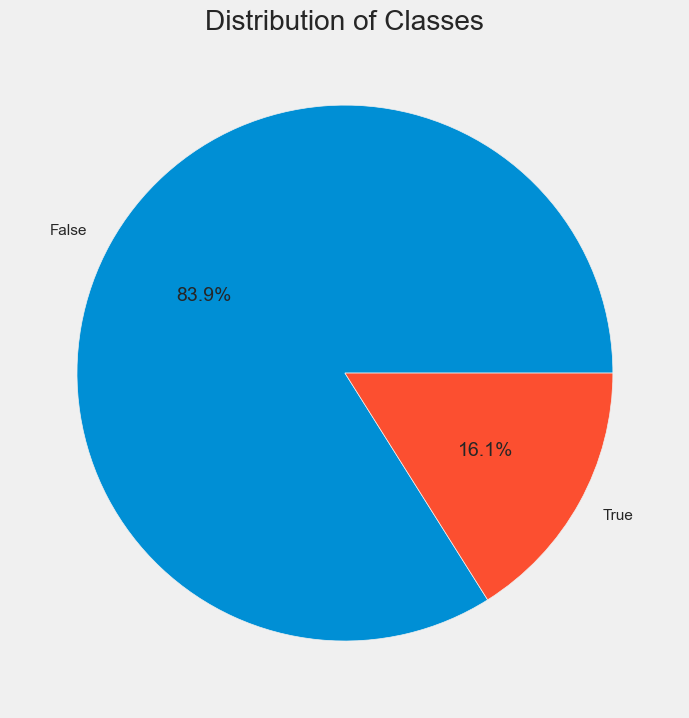

In [ ]:
target_count = y_train.value_counts()

# Create a pie chart
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')

# Set title
plt.title('Distribution of Classes')

# Display the pie chart
plt.show()

The Distribution of the Classes is imbalance, thus SMOTE is needed for handling the imbalance

In [68]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [69]:
print(f'x_train shape:{x_train.shape}', f'y_train shape:{y_train.shape}')
print('')
print(f'x_smote shape:{x_train_smote.shape}', f'y_smote shape:{y_train_smote.shape}')

x_train shape:(8596, 70) y_train shape:(8596,)

x_smote shape:(14336, 70) y_smote shape:(14336,)


In [70]:
x_train_smote[selected_feature]

,administrative_duration,informational,productrelated_duration,bouncerates,exitrates,pagevalues,month_Dec,month_Nov,month_Sep,operatingsystems_2.0,browser_2,browser_7,traffictype_1,traffictype_3,visitortype_Returning_Visitor
0,0.073454,-0.476583,-1.703480,-0.536904,1.645368,-0.510443,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000
1,1.360095,-0.476583,1.121304,0.207359,-0.015226,1.038773,0.0,1.000000,0.0,1.0,1.0,0.0,1.000000,0.0,1.000000
2,-1.060860,-0.476583,-0.545223,-0.536904,-0.350499,-0.510443,1.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000
3,-1.060860,-0.476583,1.385101,-0.208077,-0.409226,-0.510443,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000
4,-1.060860,-0.476583,-0.354222,0.958946,1.068165,-0.510443,0.0,1.000000,0.0,1.0,1.0,0.0,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14331,-0.906210,-0.476583,-0.454004,4.167853,2.428428,-0.510443,0.0,0.887142,0.0,0.0,0.0,0.0,0.887142,0.0,1.000000
14332,-0.638104,-0.476583,-0.111272,-0.063674,-0.451952,2.361915,0.0,0.000000,0.0,1.0,1.0,0.0,0.000000,0.0,0.000000
14333,-1.060860,-0.476583,-0.265838,-0.476228,-0.623549,1.338207,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.101265
14334,-1.060860,-0.476583,-0.360951,-0.536904,-0.473107,2.187389,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


# Modeling

### Model Evaluation

In [71]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

models = {
    'SVM': (SVC()),
    'KNN': (KNeighborsClassifier()),
    'Random Forest': (RandomForestClassifier()),
    'Decision Tree': (DecisionTreeClassifier()),
    'Logistic Regression': (LogisticRegression(max_iter=1000)),
    'Ada Boost': (AdaBoostClassifier()),
    'BaggingClassifier' : (BaggingClassifier()),
    'XGBoost' : (xgb.XGBClassifier())
}

def pengujian_ml(title, X_train_data, X_test_data, y_train_data, y_test_data, kf=5):
    
    print(title)

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1_score': make_scorer(f1_score),
        'roc_auc_score' : make_scorer(roc_auc_score)
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC-AUC': []}
    for name, (model) in models.items():
        print("Build model ", name, '....')
        model_cv = cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='accuracy')
        results['Model'].append(name)
        results['Accuracy'].append(np.mean(model_cv))
        results['Precision'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='precision')))
        results['Recall'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='recall')))
        results['F1-Score'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='f1')))
        results['ROC-AUC'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='roc_auc')))

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by=['Recall'], ascending=False)

    print("Hasil Evaluasi Cross-Validation:")
    print(results_df)

    best_model_name = results_df.loc[results_df['Recall'].idxmax(), 'Model']
    print(best_model_name)
    best_model = models[best_model_name]
    best_model.fit(X_train_data, y_train_data)
    y_pred_test = best_model.predict(X_test_data)

    accuracy_test_data = accuracy_score(y_test_data, y_pred_test)
    precision_test = precision_score(y_test_data, y_pred_test)
    recall_test = recall_score(y_test_data, y_pred_test)
    f1_test = f1_score(y_test_data, y_pred_test)
    roc_auc_test = roc_auc_score(y_test_data, y_pred_test)

    print("\nHasil Evaluasi pada Data Testing (Model Terbaik: {})".format(best_model_name))
    print("Accuracy:", accuracy_test_data)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("ROC_AUC:", roc_auc_test)
    print("F1-Score:", f1_test)


In [30]:
# Pengujian Model (Tanpa SMOTE)
pengujian_ml('Tanpa SMOTE', x_train, x_test, y_train, y_test, 5)

Tanpa SMOTE
Build model  SVM ....
Build model  KNN ....
Build model  Random Forest ....
Build model  Decision Tree ....
Build model  Logistic Regression ....
Build model  Ada Boost ....
Build model  BaggingClassifier ....
Build model  XGBoost ....
Hasil Evaluasi Cross-Validation:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
7              XGBoost  0.887507   0.694088  0.581902  0.631779  0.912931
0                  SVM  0.894253   0.728070  0.580496  0.645012  0.895664
3        Decision Tree  0.850396   0.559862  0.567935  0.561725  0.740863
4  Logistic Regression  0.888087   0.706447  0.560179  0.624081  0.909354
6    BaggingClassifier  0.885761   0.704791  0.549650  0.612306  0.888169
5            Ada Boost  0.878897   0.664896  0.548995  0.600858  0.905792
2        Random Forest  0.890298   0.756809  0.532200  0.613370  0.915006
1                  KNN  0.878897   0.674767  0.523784  0.589237  0.856059
XGBoost

Hasil Evaluasi pada Data Testing (Model Terb

In [31]:
pengujian_ml('Dengan SMOTE', x_train_smote, x_test, y_train_smote, y_test, 5)

Dengan SMOTE
Build model  SVM ....
Build model  KNN ....
Build model  Random Forest ....
Build model  Decision Tree ....
Build model  Logistic Regression ....
Build model  Ada Boost ....
Build model  BaggingClassifier ....
Build model  XGBoost ....
Hasil Evaluasi Cross-Validation:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1                  KNN  0.890556   0.826594  0.988561  0.900340  0.955934
2        Random Forest  0.938482   0.927697  0.951464  0.937383  0.987968
6    BaggingClassifier  0.926555   0.918912  0.934444  0.923457  0.970667
0                  SVM  0.895928   0.876675  0.921599  0.898286  0.959578
3        Decision Tree  0.895444   0.893388  0.904589  0.893694  0.897397
7              XGBoost  0.913169   0.934941  0.890933  0.896406  0.981363
5            Ada Boost  0.889586   0.903956  0.871391  0.882600  0.957542
4  Logistic Regression  0.848913   0.864644  0.827428  0.845566  0.924583
KNN

Hasil Evaluasi pada Data Testing (Model Terbaik

---

Berdasarkan evaluasi model, dari 8 model yang **digunakan pada data training dengan SMOTE dan tanpa SMOTE**. diambil model yang performanya paling baik berdasarkan skor Recall.

Recall dipilih untuk mengevaluasi model karena data yang tidak seimbang, di mana mayoritasnya berada dalam kelas negatif. ketika data `imbalaced`, prediksi akan cenderung ke kelas mayoritas. Recall menilai kemampuan model dalam mengenali label True Negatif. Ini mengukur seberapa baik model dalam mendeteksi positif yang jarang terjadi dalam data `imbalanced`.


Hasil menunjukkan bahwa model yang dilatih dengan menggunakan SMOTE pada X_train dan y_train menghasilkan skor **Recall** yang lebih tinggi dibandingkan dengan model yang dilatih tanpa menggunakan SMOTE pada X_train dan y_train.

3 Model yang dipilih untuk dilakukan hyperparameter tuning adalah model terbaik dari hasil training dengan SMOTE:
- KNN
- RandomForest
- BaggingClassifier

ketiga model ini adalah model paling baik dari hasil model lainnya berdasarkan skor Recall. akan dilakukan hyperparameter tuning untuk tahap selanjutnya, karna masih terjadi *overfitting*, berikut adalah hasil evaluasi pada kedua model terbaik:

**KNN**
| DATA |  RECALL |
|-------|-------|
|Training|0.988561|

**RandomForest**
| DATA | RECALL |
|-------|-------|
|Training|0.951464|

**BaggingClassifier** 
| DATA |  RECALL |
|-------|-------|
|Training| 0.934444|


___

### Best Hyperarameter

In [61]:
# Implementasi Hyperparameter Tuning
model_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [21, 51, 111],
            'kneighborsclassifier__weights': ['uniform', 'distance'],
            'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree'],
            'kneighborsclassifier__leaf_size': [20, 30, 40]
        }
    },
    'Random Forest' : {
        'model': RandomForestClassifier(),
        'params': {
              'randomforestclassifier__n_estimators': [4, 6, 9, 10, 15], 
              'randomforestclassifier__max_features': ['log2'], 
              'randomforestclassifier__criterion': ['entropy', 'gini'],
              'randomforestclassifier__max_depth': [2, 3, 5, 10], 
              'randomforestclassifier__min_samples_split': [2, 3, 5],
              'randomforestclassifier__min_samples_leaf': [1, 5, 8]
        }
    },
    'BaggingClassifier': {
        'model': BaggingClassifier(),
        'params': {
            'baggingclassifier__n_estimators': [50,100,200],
            'baggingclassifier__max_samples': [0.8,1.0],
            'baggingclassifier__max_features': [0.8, 1.0],
            'baggingclassifier__bootstrap': [True,False]
        }
    }
}

In [58]:
#Best Parameter Using GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MaxAbsScaler

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(MaxAbsScaler(), mp['model'])
    clf  =  GridSearchCV(pipe, mp['params'], cv=3, return_train_score=False)
    clf.fit(x_train_smote, y_train_smote)
    result = {
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    }
    print(result)
    scores.append(result)
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

{'model': 'KNN', 'best_score': 0.8360076275522067, 'best_params': {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__leaf_size': 20, 'kneighborsclassifier__n_neighbors': 21, 'kneighborsclassifier__weights': 'distance'}}
{'model': 'Random Forest', 'best_score': 0.9012981133186028, 'best_params': {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 10}}
{'model': 'BaggingClassifier', 'best_score': 0.9342924180550968, 'best_params': {'baggingclassifier__base_estimator': DecisionTreeClassifier(), 'baggingclassifier__bootstrap': False, 'baggingclassifier__max_features': 0.8, 'baggingclassifier__max_samples': 0.8, 'baggingclassifier__n_estimators': 100}}


,model,best_score,best_params
0,KNN,0.836008,"{'kneighborsclassifier__algorithm': 'auto', 'k..."
1,Random Forest,0.901298,{'randomforestclassifier__criterion': 'entropy...
2,BaggingClassifier,0.934292,{'baggingclassifier__base_estimator': Decision...


hasil nilai hyperparameter terbaik yang didapatkan untuk ketiga model:

1. KNN:
   - algorithm   :'auto'
   - leaf_size   :20
   - n_neighbors :21
   - weights     :'distance'

2. RandomForest:
   - criterion         : 'entropy'
   - max_depth         : 10
   - max_features      : 'log2'
   - min_samples_leaf  : 1
   - min_samples_split : 5
   - n_estimators      : 15

3. BaggingClassifier:
   - base_estimator   : DecisionTreeClassifier()
   - bootstrap        : False
   - max_features     : 0.8
   - max_samples      : 0.8
   - n_estimators     : 100
   
Dengan penggunaan hyperparameter ini, model-model tersebut telah dioptimalkan untuk memberikan performa terbaik dalam klasifikasi.

### Hyperparameter Tuning

In [41]:
# Hyper Parameter Tuning Results
X_train_data = x_train_smote[selected_feature]
y_train_data = y_train_smote
X_test_data  = x_test[selected_feature]
y_test_data  = y_test
kf=5

models = {
    'KNN': (KNeighborsClassifier(algorithm='auto',
                                 leaf_size=20,
                                 n_neighbors=111,
                                 weights='distance')),
    
    'Random Forest': (RandomForestClassifier(max_depth= 3,
                                             criterion= 'gini',
                                             max_features= 'log2',
                                             min_samples_leaf=1,
                                             min_samples_split=6,
                                             n_estimators=15,
                                             bootstrap=False)),
    
    'BaggingClassifier': (BaggingClassifier(n_estimators=50,
                                            max_samples=0.9,
                                            max_features=0.8,
                                            bootstrap=False,))
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc_score' : make_scorer(roc_auc_score)
}

results = {'Model': [],
           'Accuracy': [],
           'Precision': [],
           'Recall': [],
           'F1-Score': [],
           'ROC-AUC': []
          }

results_test = {'Model': [],
                'Accuracy': [],
                'Precision': [],
                'Recall': [],
                'F1-Score': [],
                'ROC-AUC': []
                }
for name, (model) in models.items():
    print("Build model ", name, '....')
    model_cv = cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='accuracy')
    results['Model'].append(name)
    results['Accuracy'].append(np.mean(model_cv))
    results['Precision'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='precision')))
    results['Recall'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='recall')))
    results['F1-Score'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='f1')))
    results['ROC-AUC'].append(np.mean(cross_val_score(model, X_train_data, y_train_data, cv=kf, scoring='roc_auc')))

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['Recall'], ascending=False)

print("Hasil Evaluasi Cross-Validation:")
print(results_df)
print('')

for name_test, (model_test) in models.items():
    print("Build model ", name_test, '....')
    
    model_tune = model_test
    model_tune.fit(X_train_data, y_train_data)
    y_pred_test = model_tune.predict(X_test_data)
    
    results_test['Model'].append(name_test)
    results_test['Accuracy'].append(accuracy_score(y_test_data, y_pred_test))
    results_test['Precision'].append(precision_score(y_test_data, y_pred_test))
    results_test['Recall'].append(recall_score(y_test_data, y_pred_test))
    results_test['F1-Score'].append(f1_score(y_test_data, y_pred_test))
    results_test['ROC-AUC'].append(roc_auc_score(y_test_data, y_pred_test))
    
results_test_df = pd.DataFrame(results_test)
results_test_df = results_test_df.sort_values(by=['Recall'], ascending=False)

print('')
print("Hasil Evaluasi pada Data Testing")
print(results_test_df)

Build model  KNN ....
Build model  Random Forest ....
Build model  BaggingClassifier ....
Hasil Evaluasi Cross-Validation:
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
2  BaggingClassifier  0.914626   0.906015  0.924257  0.913260  0.969134
0                KNN  0.872908   0.854689  0.898717  0.876098  0.943080
1      Random Forest  0.866073   0.865005  0.841940  0.866572  0.925967

Build model  KNN ....
Build model  Random Forest ....
Build model  BaggingClassifier ....

Hasil Evaluasi pada Data Testing
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0                KNN  0.865086   0.531732  0.844687  0.652632  0.856687
1      Random Forest  0.880213   0.571984  0.801090  0.667423  0.847635
2  BaggingClassifier  0.889616   0.619753  0.683924  0.650259  0.804925


---

Setelah melakukan tuning hyperparameter, terjadi penurunan *GAP* antara nilai metrik `Training` dan `Testing` dataset jika dibandingkan dengan model yang tidak dilakukan Hyperparameter tuning. selain itu juga, terdapat kenaikan pada metrik Recall dalam data Test. Berikut adalah hasil evaluasi cross-validation untuk setiap model:

**KNN** 
Sebelum Hyperparameter Tuning:
| DATA | RECALL |
|-------|-------|
|Training|0.988561|


Setelah Hyperparameter Tuning:
| DATA | RECALL |
|-------|-------|
|Training|0.898717|
|Testing|0.844687|

---

**RandomForest**
Sebelum Hyperparameter Tuning:
| DATA | RECALL |
|-------|-------|
|Training|0.951464|


Setelah Hyperparameter Tuning:
| DATA | RECALL |
|-------|-------|
|Training|0.841940|
|Testing|0.801090|

---

**Bagging Classifier**
Sebelum Hyperparameter Tuning:
| DATA | RECALL |
|-------|-------|
|Training|0.934444|


Setelah Hyperparameter Tuning:
| DATA | RECALL |
|-------|-------|
|Training|0.924257|
|Testing|0.683924|

---

### Feature Importance

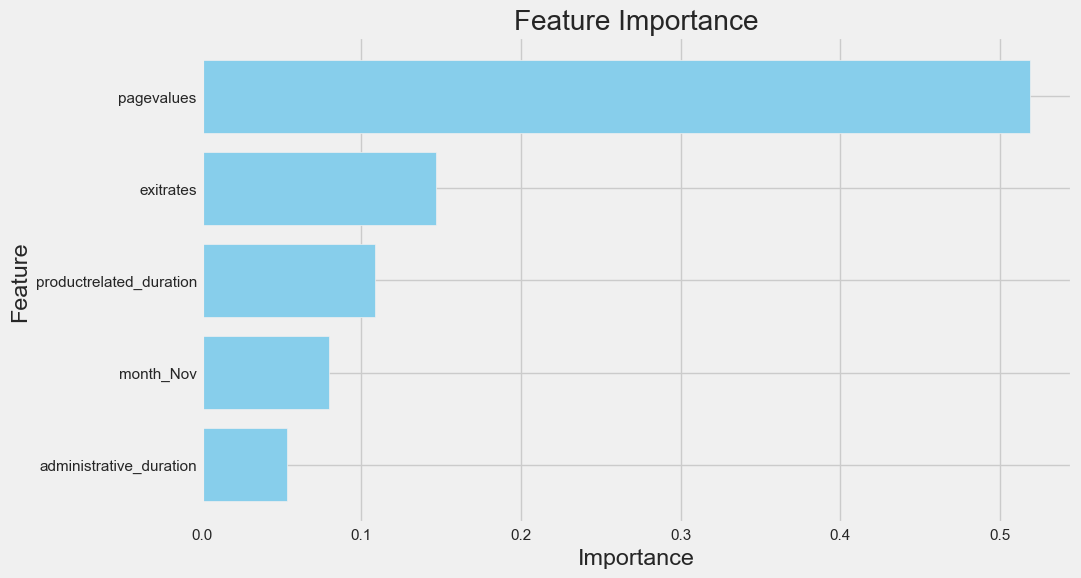

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(max_depth= 3,
                            criterion= 'gini',
                            max_features= 'log2',
                            min_samples_leaf=1,
                            min_samples_split=6,
                            n_estimators=15,
                            bootstrap=False, random_state=346)

# fit model
rf.fit(x_train_smote[selected_feature], y_train_smote)

# feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance scores
importance_df = pd.DataFrame({'Feature': x_train_smote[selected_feature].columns, 'Importance': importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:5], importance_df['Importance'][:5], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [73]:
top_5 = ['pagevalues','administrative_duration','exitrates','bouncerates','productrelated_duration']

In [74]:
rf_5_feature = RandomForestClassifier(max_depth= 3,
                            criterion= 'gini',
                            max_features= 'log2',
                            min_samples_leaf=1,
                            min_samples_split=6,
                            n_estimators=15,
                            bootstrap=False, random_state=346)

# fit model
rf_5_feature.fit(x_train_smote[top_5], y_train_smote)

RandomForestClassifier(bootstrap=False, max_depth=3, max_features='log2',
                       min_samples_split=6, n_estimators=15, random_state=346)

In [81]:
rf_5_feature.predict([[10,40,1,5,6]])

c:\laragon\pyproject\rakamin\final_project_rakamin\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [75]:
from sklearn.metrics import classification_report

y_pred = rf_5_feature.predict(x_test[top_5])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93      2079
        True       0.58      0.80      0.67       367

    accuracy                           0.88      2446
   macro avg       0.77      0.85      0.80      2446
weighted avg       0.90      0.88      0.89      2446



In [31]:
importance_df

,Feature,Importance
5,pagevalues,0.523921
4,exitrates,0.118413
0,administrative_duration,0.110878
2,productrelated_duration,0.092220
7,month_Nov,0.058582
3,bouncerates,0.041834
13,traffictype_3,0.024510
8,operatingsystems_3.0,0.017880
6,month_Mar,0.006243
14,visitortype_New_Visitor,0.004724


1. Fitur pagevalues memiliki skor importance yang paling tinggi dengan skor 0.446919. Hal ini menunjukkan bahwa nilai-nilai halaman yang dikunjungi oleh pengguna memiliki dampak signifikan terhadap keputusan pembelian atau konversi. Semakin tinggi nilai halaman, semakin tinggi kemungkinan pengguna akan melakukan tindakan yang diinginkan, seperti melakukan pembelian.

2. Fitur exitrates memiliki skor importance kedua tertinggi dengan skor 0.257574. exit rate mengacu pada persentase pengunjung yang meninggalkan situs. Semakin rendah exit rate, semakin baik, karena itu menunjukkan bahwa pengunjung terlibat dengan konten atau ada tindakan lebih lanjut pada situs.

3. Fitur productrelated_duration memiliki skor importance ketiga tertinggi dengan skor 0.118597. productrelated_duration mengacu pada durasi kunjungan terhadap halaman yang relevan, Hal ini mengindikasikan tingkat minat dan keterlibatan yang lebih tinggi terhadap penawaran produk relevan, yang kemungkinan mengindikasikan peluang yang lebih tinggi untuk terjadinya konversi atau pembelian.

In [77]:
import pickle
import os

model_dir  = 'model'
model_name = 'random_forest_model.pkl'
model_path = os.path.join(model_dir, model_name)

# Save the model using pickle
with open(model_path, 'wb') as file:
    pickle.dump(rf, file)

# Confirm that the model has been saved successfully
if os.path.exists(model_path):
    print('Model saved successfully.')
else:
    print('Failed to save the model.')

Model saved successfully.


In [78]:
with open(os.path.join('model', 'rf_5_feature.pkl'), 'wb') as file:
    pickle.dump(rf_5_feature, file)